In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_4 = pd.read_excel("Data Sets/Data Set 4.xlsx")
data_4.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         565         259         3.8462              342200        NEAR BAY  
3         413         193         4.0368              269700        NEAR BAY  
4        1094         514         3.6591              299200        NEAR BAY

In [3]:
data_4.shape

(18565, 10)

In [4]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


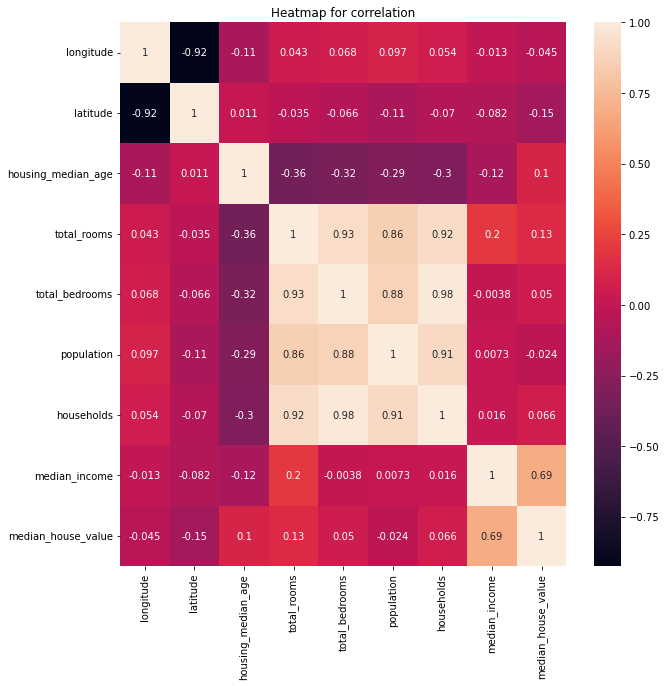

In [5]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_4.corr(),annot = True)
plt.title("Heatmap for correlation")
plt.show()

In [6]:
mean_households = data_4.loc[data_4.total_bedrooms.isnull()==False,'households'].mean()
mean_bedrooms = data_4.loc[data_4.total_bedrooms.isnull()==False,'total_bedrooms'].mean()
print(f"Mean Households = {mean_households} and Mean total_bedrooms = {mean_bedrooms}")
print(f"Ratio of Bedrooms to Households = {mean_bedrooms/mean_households}")

Mean Households = 499.3758707009142 and Mean total_bedrooms = 537.7111993905094
Ratio of Bedrooms to Households = 1.0767664818001488


In [7]:
data_4.loc[data_4.total_bedrooms.isnull()==True,'total_bedrooms'] = round(data_4.
                                                                          loc[data_4.total_bedrooms.isnull()==True,
                                                                              'households']*mean_bedrooms/mean_households,0)

In [8]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18565 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [9]:
data_4.loc[data_4.housing_median_age == max(data_4.housing_median_age),['housing_median_age','median_house_value']]

housing_median_age  median_house_value
2                      52              342200
3                      52              269700
4                      52              299200
5                      52              241400
7                      52              261100
...                   ...                 ...
18113                  52              183300
18185                  52              349000
18200                  52              198400
18201                  52              206600
18521                  52               55000

[1129 rows x 2 columns]

In [10]:
data_4.housing_median_age.value_counts().head()

52    1129
36     782
35     742
16     705
17     634
Name: housing_median_age, dtype: int64

In [11]:
data_4.median_house_value.value_counts().head

<bound method NDFrame.head of 500001    868
137500    112
162500    109
112500     97
187500     87
         ... 
454300      1
365300      1
262200      1
300700      1
47000       1
Name: median_house_value, Length: 3759, dtype: int64>

In [12]:
round(data_4.describe(),2).transpose()

count       mean        std       min        25%  \
longitude           18565.0    -119.57       2.00   -124.35    -121.80   
latitude            18565.0      35.63       2.14     32.54      33.93   
housing_median_age  18565.0      28.62      12.56      1.00      18.00   
total_rooms         18565.0    2634.03    2195.92      2.00    1442.00   
total_bedrooms      18565.0     537.79     424.07      2.00     295.00   
population          18565.0    1426.22    1142.57      3.00     786.00   
households          18565.0     499.45     384.55      2.00     279.00   
median_income       18565.0       3.87       1.90      0.50       2.56   
median_house_value  18565.0  206617.79  115447.10  14999.00  119300.00   

                          50%        75%        max  
longitude             -118.50    -118.01    -114.31  
latitude                34.26      37.71      41.95  
housing_median_age      29.00      37.00      52.00  
total_rooms           2123.00    3141.00   39320.00  
total_bedrooms         434.00     646.00    6445.00  
population            1166.00    1725.00   35682.00  
households             408.00     603.00    6082.00  
median_income            3.53       4.74      15.00  
median_house_value  179400.00  264400.00  500001.00

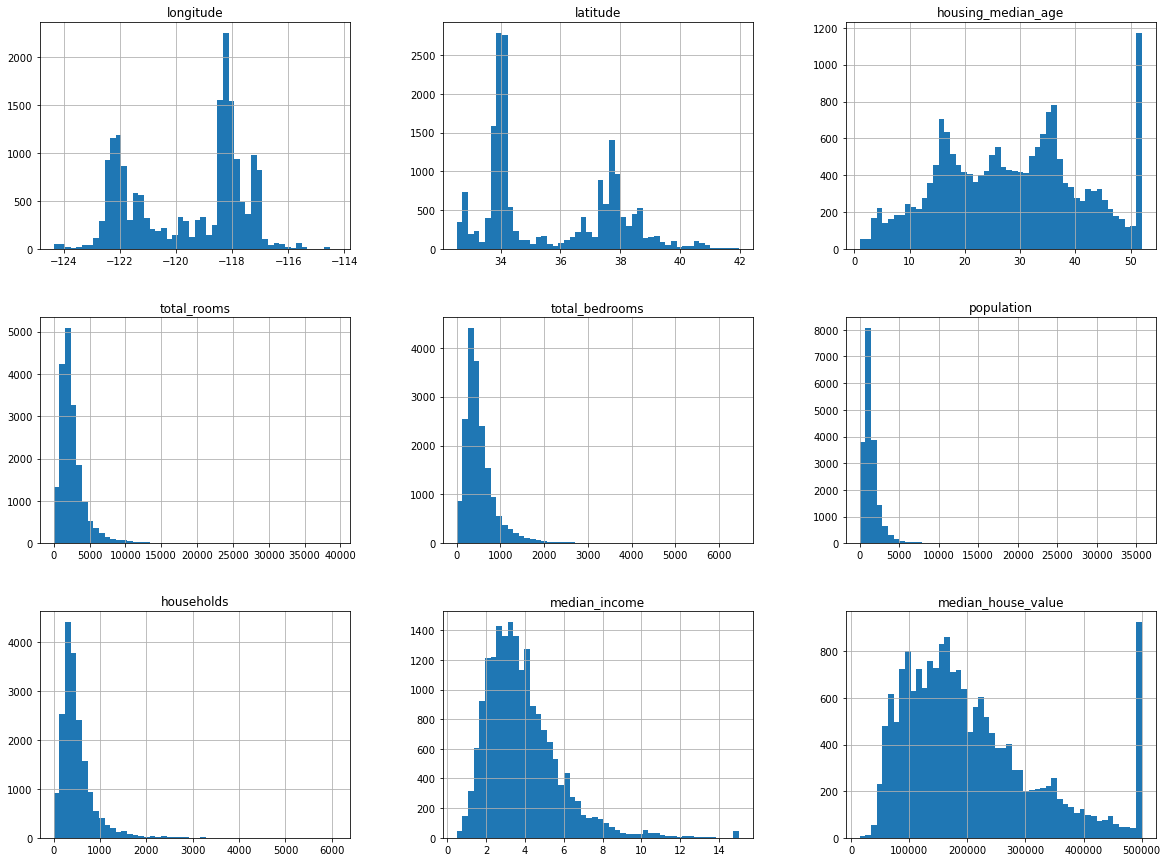

In [13]:
data_4.hist(bins=50,figsize=(20,15))
plt.show()

---------------------------------------------------------------

In [14]:
round(data_4.describe(),2).transpose()

count       mean        std       min        25%  \
longitude           18565.0    -119.57       2.00   -124.35    -121.80   
latitude            18565.0      35.63       2.14     32.54      33.93   
housing_median_age  18565.0      28.62      12.56      1.00      18.00   
total_rooms         18565.0    2634.03    2195.92      2.00    1442.00   
total_bedrooms      18565.0     537.79     424.07      2.00     295.00   
population          18565.0    1426.22    1142.57      3.00     786.00   
households          18565.0     499.45     384.55      2.00     279.00   
median_income       18565.0       3.87       1.90      0.50       2.56   
median_house_value  18565.0  206617.79  115447.10  14999.00  119300.00   

                          50%        75%        max  
longitude             -118.50    -118.01    -114.31  
latitude                34.26      37.71      41.95  
housing_median_age      29.00      37.00      52.00  
total_rooms           2123.00    3141.00   39320.00  
total_bedrooms         434.00     646.00    6445.00  
population            1166.00    1725.00   35682.00  
households             408.00     603.00    6082.00  
median_income            3.53       4.74      15.00  
median_house_value  179400.00  264400.00  500001.00

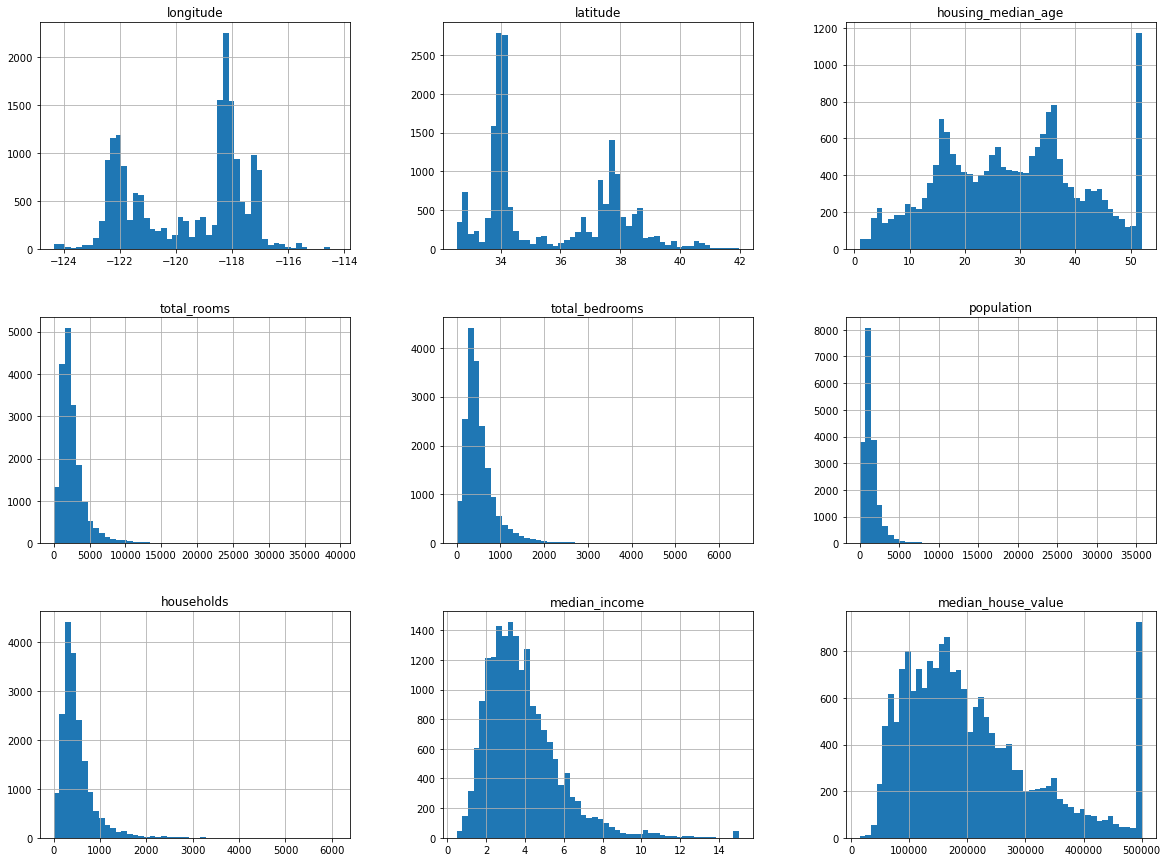

In [15]:
data_4.hist(bins=50,figsize=(20,15))
plt.show()

In [16]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18565 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


As we can see all the columns have complete columns except for total_rooms which has 18376 non-null values against the total of 18565 non-null elements. We can replace this with something else. We can take any of the following approaches:
- Replace by the average values
- Take the ratio of mean total bedrooms to mean total rooms for non null values and multiply the ratio by the number of rooms

We will be taking the second approach. 

In [17]:
mean_total_households = round(data_4.loc[data_4.total_bedrooms.isnull()==False,'households'].mean(),0)
print(f"Average number of total households in non null columns {mean_total_households}")
mean_total_bedrooms = round(data_4.loc[data_4.total_bedrooms.isnull()==False,'total_bedrooms'].mean(),0)
print(f"Average number of total bed rooms in non null columns {mean_total_bedrooms}")
print(f"Ratio of the number of bedrooms to number of total rooms = {mean_total_bedrooms/mean_total_households}")

Average number of total households in non null columns 499.0
Average number of total bed rooms in non null columns 538.0
Ratio of the number of bedrooms to number of total rooms = 1.0781563126252505


Now we multiply the number of rooms in null columns of total bedrooms with 1.07815 and round it to arrive at the total number of bedrooms in the null columns.

In [18]:
data_4.loc[data_4.total_bedrooms.isnull(),'total_bedrooms'] = round(data_4.loc[data_4.total_bedrooms.isnull(),
                                                                         'total_rooms']*mean_total_bedrooms/mean_total_households,0)

In [19]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18565 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


Now we can see there is no null column in the data and all the data points are complete. Next step will be creation of dummy variables from ```ocean_proximities``` which is a categorical variables. 

In [20]:
data_4 = data_4.loc[data_4.median_house_value != max(data_4.median_house_value),:]

In [21]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17697 non-null  float64
 1   latitude            17697 non-null  float64
 2   housing_median_age  17697 non-null  int64  
 3   total_rooms         17697 non-null  int64  
 4   total_bedrooms      17697 non-null  float64
 5   population          17697 non-null  int64  
 6   households          17697 non-null  int64  
 7   median_income       17697 non-null  float64
 8   median_house_value  17697 non-null  int64  
 9   ocean_proximity     17697 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


In [22]:
data_4_dummies = pd.get_dummies(data_4,
                                columns= data_4.select_dtypes('object').columns,
                               drop_first = True)

In [23]:
data_4_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   17697 non-null  float64
 1   latitude                    17697 non-null  float64
 2   housing_median_age          17697 non-null  int64  
 3   total_rooms                 17697 non-null  int64  
 4   total_bedrooms              17697 non-null  float64
 5   population                  17697 non-null  int64  
 6   households                  17697 non-null  int64  
 7   median_income               17697 non-null  float64
 8   median_house_value          17697 non-null  int64  
 9   ocean_proximity_INLAND      17697 non-null  uint8  
 10  ocean_proximity_ISLAND      17697 non-null  uint8  
 11  ocean_proximity_NEAR BAY    17697 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  17697 non-null  uint8  
dtypes: float64(4), int64(5), uint8(

In [24]:
data_4.ocean_proximity.value_counts()

<1H OCEAN     7709
INLAND        5895
NEAR OCEAN    2208
NEAR BAY      1880
ISLAND           5
Name: ocean_proximity, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Now remember we cannot standardize the variables before train-test-split, because we will be carrying the impact of train dataset into test dataset. Therefore, we will be splitting the data into train and test before running the ```StandardScaler```

In [26]:
x_variables = data_4_dummies.loc[:,data_4_dummies.columns!='median_house_value']
y_variables = data_4_dummies.loc[:,data_4_dummies.columns == 'median_house_value']

In [27]:
print(y_variables.head())
print(x_variables.head())

   median_house_value
0              452600
1              358500
2              342200
3              269700
4              299200
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  ocean_proximity_INLAND  \
0         322         126         8.3252                       0   
1        2401        1138         8.3014                       0   
2         565         259         3.8462                       0   
3         413         193         4.0368                       0   
4        1094         514         3.6591                       0   

   ocean

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_variables,y_variables, test_size = 0.20, random_state = 1)

Now we standardize the columns. However, we will not be standardizing the dummy variables because their values are 0/1 already. 

In [29]:
x_scaler = StandardScaler()
x_train_scaled = x_train.copy(deep = True)

In [30]:
x_train_scaled.loc[:,
                   [col for col in x_train_scaled.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(x_train_scaled.loc[:,
                                   [col for col in x_train_scaled.columns 
                                    if 'ocean_proximity' not in col ]])

In [31]:
x_train_scaled.describe().transpose()

count          mean       std       min  \
longitude                   14157.0 -2.214392e-15  1.000035 -2.387681   
latitude                    14157.0  4.035293e-16  1.000035 -1.446501   
housing_median_age          14157.0  6.223585e-17  1.000035 -2.192778   
total_rooms                 14157.0  2.158179e-17  1.000035 -1.180517   
total_bedrooms              14157.0  1.094146e-16  1.000035 -1.255110   
population                  14157.0  6.323966e-17  1.000035 -1.233388   
households                  14157.0 -2.710271e-17  1.000035 -1.284866   
median_income               14157.0 -3.011412e-17  1.000035 -2.035058   
ocean_proximity_INLAND      14157.0  3.340397e-01  0.471670  0.000000   
ocean_proximity_ISLAND      14157.0  2.119093e-04  0.014556  0.000000   
ocean_proximity_NEAR BAY    14157.0  1.072967e-01  0.309501  0.000000   
ocean_proximity_NEAR OCEAN  14157.0  1.231193e-01  0.328586  0.000000   

                                 25%       50%       75%        max  
longitude                  -1.096863  0.527874  0.782050   2.616108  
latitude                   -0.800553 -0.642551  0.965347   2.926426  
housing_median_age         -0.830361 -0.028939  0.692341   1.894474  
total_rooms                -0.535682 -0.233317  0.227215  16.536900  
total_bedrooms             -0.569967 -0.246039  0.255001  13.759778  
population                 -0.554472 -0.224859  0.256289  29.312698  
households                 -0.567968 -0.239069  0.269696  14.337840  
median_income              -0.736271 -0.143225  0.579038   6.095812  
ocean_proximity_INLAND      0.000000  0.000000  1.000000   1.000000  
ocean_proximity_ISLAND      0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR BAY    0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR OCEAN  0.000000  0.000000  0.000000   1.000000

In [32]:
x_test_scaled = x_test.copy(deep = True)
x_test_scaled.loc[:,
                   [col for col in x_test_scaled.columns 
                    if 'ocean_proximity' not in col]]= x_scaler.fit_transform(x_test_scaled.loc[:,
                                   [col for col in x_test_scaled.columns 
                                    if 'ocean_proximity' not in col ]])

In [33]:
x_test_scaled.describe().transpose()

count          mean       std       min  \
longitude                   3540.0 -3.322891e-15  1.000141 -2.341622   
latitude                    3540.0  2.175786e-15  1.000141 -1.448145   
housing_median_age          3540.0  1.374920e-16  1.000141 -2.188676   
total_rooms                 3540.0  1.023663e-16  1.000141 -1.239126   
total_bedrooms              3540.0 -5.218675e-17  1.000141 -1.307702   
population                  3540.0  1.204310e-17  1.000141 -1.301677   
households                  3540.0 -1.806465e-17  1.000141 -1.334660   
median_income               3540.0  3.010774e-17  1.000141 -2.007323   
ocean_proximity_INLAND      3540.0  3.293785e-01  0.470054  0.000000   
ocean_proximity_ISLAND      3540.0  5.649718e-04  0.023766  0.000000   
ocean_proximity_NEAR BAY    3540.0  1.019774e-01  0.302661  0.000000   
ocean_proximity_NEAR OCEAN  3540.0  1.313559e-01  0.337837  0.000000   

                                 25%       50%       75%        max  
longitude                  -1.103965  0.513358  0.790613   2.499104  
latitude                   -0.800731 -0.637714  0.955202   2.930045  
housing_median_age         -0.832263 -0.034372  0.683729   1.880564  
total_rooms                -0.556852 -0.226487  0.225130  12.017580  
total_bedrooms             -0.580650 -0.241686  0.259391   8.949632  
population                 -0.585151 -0.240597  0.293142  12.433877  
households                 -0.584426 -0.234046  0.278308   9.690453  
median_income              -0.723343 -0.139015  0.595021   7.086919  
ocean_proximity_INLAND      0.000000  0.000000  1.000000   1.000000  
ocean_proximity_ISLAND      0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR BAY    0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR OCEAN  0.000000  0.000000  0.000000   1.000000

Now we have scaled the relevant columns, we can start running the model. We also need to scale the output columns as well. 

In [34]:
y_train_scaled = y_train.copy(deep = True)
y_train_scaled.loc[:,:]= x_scaler.fit_transform(y_train_scaled)

In [35]:
y_train_scaled.describe().transpose()

count          mean       std       min       25%  \
median_house_value  14157.0 -2.810651e-17  1.000035 -1.819153 -0.776208   

                         50%       75%       max  
median_house_value -0.188334  0.569415  3.174179

In [36]:
y_test_scaled = y_test.copy(deep = True)
y_test_scaled.loc[:,:] = x_scaler.fit_transform(y_test_scaled)

In [37]:
y_test.describe().transpose()

count           mean            std      min       25%  \
median_house_value  3540.0  194368.107345  100106.139616  17500.0  115950.0   

                         50%       75%       max  
median_house_value  173950.0  251150.0  500000.0

In [38]:
y_test_scaled.describe().transpose()

count          mean       std       min      25%  \
median_house_value  3540.0  4.014366e-17  1.000141 -1.767055 -0.78346   

                         50%       75%      max  
median_house_value -0.203993  0.567297  3.05351

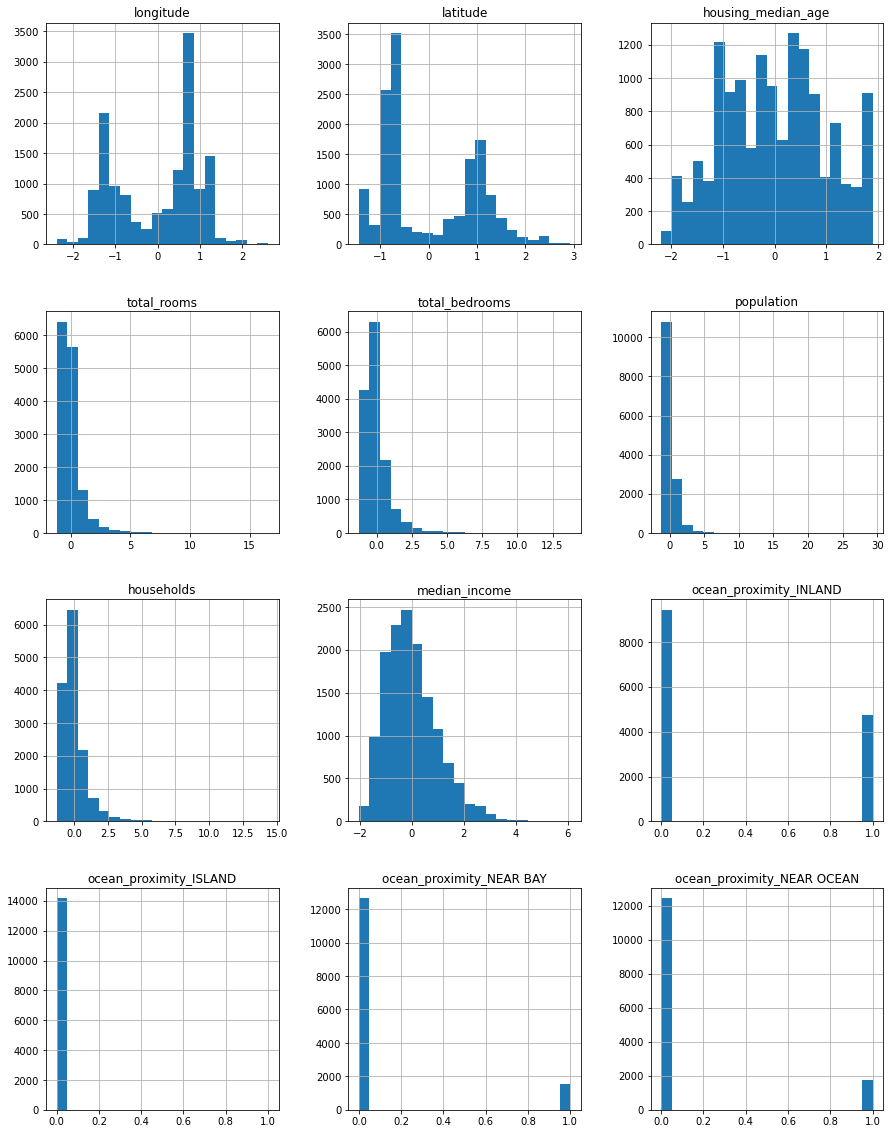

In [39]:
x_train_scaled.hist(bins = 20, figsize=(15,20))
plt.show()

In [40]:
x_test_scaled.describe().transpose()

count          mean       std       min  \
longitude                   3540.0 -3.322891e-15  1.000141 -2.341622   
latitude                    3540.0  2.175786e-15  1.000141 -1.448145   
housing_median_age          3540.0  1.374920e-16  1.000141 -2.188676   
total_rooms                 3540.0  1.023663e-16  1.000141 -1.239126   
total_bedrooms              3540.0 -5.218675e-17  1.000141 -1.307702   
population                  3540.0  1.204310e-17  1.000141 -1.301677   
households                  3540.0 -1.806465e-17  1.000141 -1.334660   
median_income               3540.0  3.010774e-17  1.000141 -2.007323   
ocean_proximity_INLAND      3540.0  3.293785e-01  0.470054  0.000000   
ocean_proximity_ISLAND      3540.0  5.649718e-04  0.023766  0.000000   
ocean_proximity_NEAR BAY    3540.0  1.019774e-01  0.302661  0.000000   
ocean_proximity_NEAR OCEAN  3540.0  1.313559e-01  0.337837  0.000000   

                                 25%       50%       75%        max  
longitude                  -1.103965  0.513358  0.790613   2.499104  
latitude                   -0.800731 -0.637714  0.955202   2.930045  
housing_median_age         -0.832263 -0.034372  0.683729   1.880564  
total_rooms                -0.556852 -0.226487  0.225130  12.017580  
total_bedrooms             -0.580650 -0.241686  0.259391   8.949632  
population                 -0.585151 -0.240597  0.293142  12.433877  
households                 -0.584426 -0.234046  0.278308   9.690453  
median_income              -0.723343 -0.139015  0.595021   7.086919  
ocean_proximity_INLAND      0.000000  0.000000  1.000000   1.000000  
ocean_proximity_ISLAND      0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR BAY    0.000000  0.000000  0.000000   1.000000  
ocean_proximity_NEAR OCEAN  0.000000  0.000000  0.000000   1.000000

In [41]:
data_4.ocean_proximity.value_counts()

<1H OCEAN     7709
INLAND        5895
NEAR OCEAN    2208
NEAR BAY      1880
ISLAND           5
Name: ocean_proximity, dtype: int64

### Building the models
<br>We will attempt running following type of models:
1. Linear Regression Model (simple regression model)
2. LASSO Regression to remove multi collinearity
3. Decision Trees including Random Forest
4. Deep Learning Model

#### Linear Regression
We will start building the linear regression model. 

In [42]:
import statsmodels.api as sm

In [43]:
x_train_scaled = sm.add_constant(x_train_scaled)
model_1 = sm.OLS(y_train_scaled,x_train_scaled).fit()

In [44]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                OLS                  Adj. R-squared:       0.611     
Dependent Variable:   median_house_value   AIC:                  26824.5071
Date:                 2022-08-12 11:30     BIC:                  26922.7606
No. Observations:     14157                Log-Likelihood:       -13399.   
Df Model:             12                   F-statistic:          1854.     
Df Residuals:         14144                Prob (F-statistic):   0.00      
R-squared:            0.611                Scale:                0.38907   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
const                       0.1347   0.0093  14.4934 0.0000  0.1165  0.1529
longitude                  -0.4992   0.0220 -22.6528 0.0000 -0.5424 -0.4560
latitude                   -0.4919   0.0232 -21.1939 0.0000 -0.5374 -0.4464
housing_median_age          0.1209   0.0061  19.7222 0.0000  0.1089  0.1329
total_rooms                -0.1631   0.0197  -8.2786 0.0000 -0.2018 -0.1245
total_bedrooms              0.3908   0.0315  12.4049 0.0000  0.3291  0.4526
population                 -0.3396   0.0131 -25.8476 0.0000 -0.3654 -0.3139
households                  0.1635   0.0302   5.4078 0.0000  0.1042  0.2228
median_income               0.6169   0.0072  86.0000 0.0000  0.6028  0.6309
ocean_proximity_INLAND     -0.3978   0.0187 -21.2769 0.0000 -0.4344 -0.3611
ocean_proximity_ISLAND      1.7763   0.3605   4.9277 0.0000  1.0697  2.4828
ocean_proximity_NEAR BAY   -0.0666   0.0211  -3.1626 0.0016 -0.1079 -0.0253
ocean_proximity_NEAR OCEAN  0.0399   0.0175   2.2859 0.0223  0.0057  0.0741
---------------------------------------------------------------------------
Omnibus:                3055.347         Durbin-Watson:            1.979   
Prob(Omnibus):          0.000            Jarque-Bera (JB):         9449.982
Skew:                   1.108            Prob(JB):                 0.000   
Kurtosis:               6.334            Condition No.:            136     
===========================================================================

"""

<Figure size 720x576 with 0 Axes>

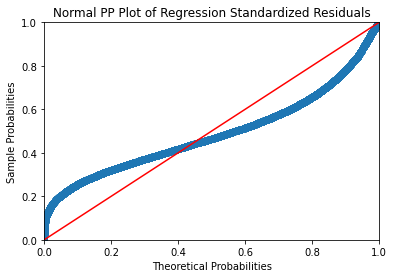

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
house_price_data_resid = model_1.resid
probplot = sm.ProbPlot(house_price_data_resid)
plt.figure(figsize = (10,8))
probplot.ppplot(line = '45')
plt.title('Normal PP Plot of Regression Standardized Residuals')
plt.show()

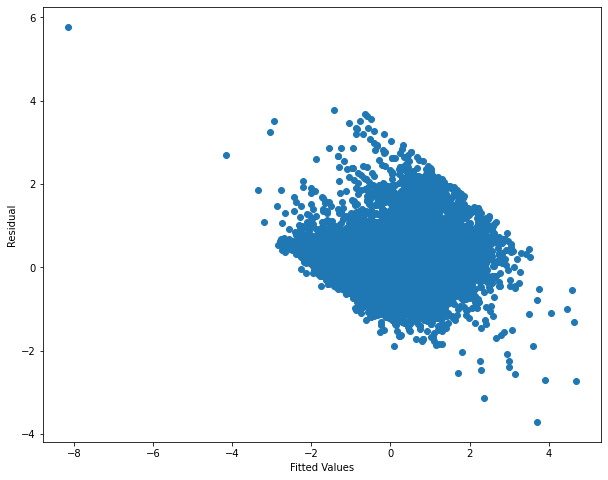

In [46]:
def standardized(vals):
    return((vals-vals.mean())/vals.std())
plt.figure(figsize = (10,8))
plt.scatter(standardized(model_1.fittedvalues),model_1.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.show()

R2 Score 0.6199277978195414


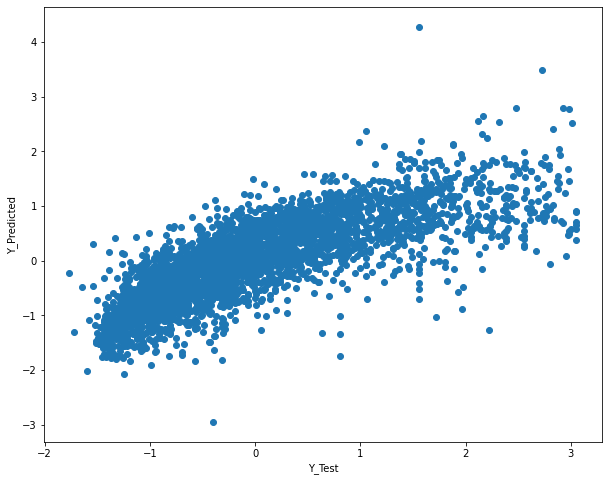

In [47]:
pred = model_1.predict(sm.add_constant(x_test_scaled))
from sklearn.metrics import r2_score
print("R2 Score",r2_score(y_test_scaled,pred))
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,pred)
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

We can see at the higher value of Y_test we can see that there is the regression is not working well, for remaining portion is working fine. 

In [48]:
y_pred = model_1.predict(sm.add_constant(x_test_scaled))

In [49]:
from sklearn.metrics import r2_score,mean_squared_error

In [50]:
np.abs(r2_score(y_test_scaled,y_pred))

0.6199277978195414

In [51]:
y_predict_actual = y_pred.iloc[:]*np.std(y_test)[0] + np.mean(y_test,axis=0)[0]

In [52]:
np.sqrt(mean_squared_error(y_test,y_predict_actual))

61706.71370642188

In [53]:
y_predict_test = model_1.predict(sm.add_constant(x_train_scaled))

In [54]:
y_predict_test_actual = y_predict_test*np.std(y_train)[0] + np.mean(y_train,axis=0)[0]

In [55]:
np.sqrt(mean_squared_error(y_train,y_predict_test_actual))

60556.96400013982

In [56]:
model_1.params

const                         0.134725
longitude                    -0.499216
latitude                     -0.491897
housing_median_age            0.120870
total_rooms                  -0.163133
total_bedrooms                0.390821
population                   -0.339639
households                    0.163509
median_income                 0.616856
ocean_proximity_INLAND       -0.397752
ocean_proximity_ISLAND        1.776250
ocean_proximity_NEAR BAY     -0.066618
ocean_proximity_NEAR OCEAN    0.039896
dtype: float64

##### Resolving for Multi-collinearity using VIF Factors

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors(X):
    #X_matrix = X.as_matrix()
    vif = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF']  = vif
    return vif_factors

In [58]:
vif_factors = get_vif_factors(x_variables)

In [59]:
vif_factors.sort_values(by = ['VIF'])

column         VIF
9       ocean_proximity_ISLAND    1.002109
11  ocean_proximity_NEAR OCEAN    1.311530
10    ocean_proximity_NEAR BAY    1.640952
8       ocean_proximity_INLAND    2.816709
2           housing_median_age    8.364593
7                median_income   12.036250
5                   population   16.394810
3                  total_rooms   33.608614
6                   households   90.704407
4               total_bedrooms   95.845383
1                     latitude  796.646021
0                    longitude  834.910141

-------------------

In [60]:
columns_to_select = ['ocean_proximity_ISLAND',
                     'ocean_proximity_NEAR OCEAN',
                     'ocean_proximity_NEAR BAY',
                     'housing_median_age',
                     'median_income',
                     'latitude']

x_train_scaled_2 = sm.add_constant(x_train_scaled.loc[:,columns_to_select])
print(x_train_scaled_2.head(2))
model_2 = sm.OLS(y_train_scaled, x_train_scaled_2).fit()

       const  ocean_proximity_ISLAND  ocean_proximity_NEAR OCEAN  \
14344    1.0                       0                           0   
699      1.0                       0                           0   

       ocean_proximity_NEAR BAY  housing_median_age  median_income  latitude  
14344                         1            1.894474       0.031378  0.960700  
699                           1            0.211488       0.499644  0.928171  


In [61]:
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                OLS                  Adj. R-squared:       0.493     
Dependent Variable:   median_house_value   AIC:                  30561.7635
Date:                 2022-08-12 11:30     BIC:                  30614.6693
No. Observations:     14157                Log-Likelihood:       -15274.   
Df Model:             6                    F-statistic:          2297.     
Df Residuals:         14150                Prob (F-statistic):   0.00      
R-squared:            0.493                Scale:                0.50682   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
const                      -0.1017   0.0069 -14.7822 0.0000 -0.1152 -0.0882
ocean_proximity_ISLAND      2.1404   0.4112   5.2051 0.0000  1.3344  2.9464
ocean_proximity_NEAR OCEAN  0.3966   0.0185  21.3804 0.0000  0.3602  0.4330
ocean_proximity_NEAR BAY    0.4887   0.0217  22.5692 0.0000  0.4463  0.5312
housing_median_age          0.1570   0.0064  24.6345 0.0000  0.1445  0.1695
median_income               0.6555   0.0062 105.9503 0.0000  0.6434  0.6676
latitude                   -0.1296   0.0065 -19.9200 0.0000 -0.1423 -0.1168
---------------------------------------------------------------------------
Omnibus:                2385.334         Durbin-Watson:            1.991   
Prob(Omnibus):          0.000            Jarque-Bera (JB):         5022.507
Skew:                   1.003            Prob(JB):                 0.000   
Kurtosis:               5.119            Condition No.:            76      
===========================================================================

"""

In [62]:
y_pred_2 = model_2.predict(sm.add_constant(x_test_scaled.loc[:,columns_to_select]))
np.abs(r2_score(y_test_scaled,y_pred_2))

0.5054652673209186

#### Regularized Regression Model

In [63]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01, max_iter = 5000)
lasso.fit(x_train_scaled.iloc[:,1:],y_train_scaled)

Lasso(alpha=0.01, max_iter=5000)

In [64]:
y_pred = lasso.predict(x_train_scaled.iloc[:,1:])
print(np.abs(r2_score(y_train_scaled,y_pred)))
y_pred_test = lasso.predict(x_test_scaled)
print(np.abs(r2_score(y_test_scaled,y_pred_test)))

0.602599068540705
0.607587414019097


In [65]:
lasso_coef_df = pd.DataFrame({'columns': x_train_scaled.iloc[:,1:].columns, 'coef':lasso.coef_})
lasso_coef_df

columns      coef
0                    longitude -0.289189
1                     latitude -0.282708
2           housing_median_age  0.113457
3                  total_rooms -0.000000
4               total_bedrooms  0.209030
5                   population -0.263451
6                   households  0.113581
7                median_income  0.577048
8       ocean_proximity_INLAND -0.517183
9       ocean_proximity_ISLAND  0.000000
10    ocean_proximity_NEAR BAY -0.000000
11  ocean_proximity_NEAR OCEAN  0.000000

In [66]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 2, max_iter = 5000)
ridge.fit(x_train_scaled.iloc[:,1:],y_train_scaled)

Ridge(alpha=2, max_iter=5000)

In [67]:
y_pred = ridge.predict(x_train_scaled.iloc[:,1:])
print(np.abs(r2_score(y_train_scaled, y_pred)))
y_pred_test = ridge.predict(x_test_scaled)
print(np.abs(r2_score(y_test_scaled,y_pred_test)))

0.6111845059989005
0.619824624585499


In [68]:
ridge_df = pd.DataFrame({'columns': list(x_train_scaled.iloc[:,1:].columns)})
pd.Series(list(ridge.coef_[0]))
ridge_df['coef'] = ridge.coef_[0]
ridge_df

columns      coef
0                    longitude -0.498278
1                     latitude -0.491103
2           housing_median_age  0.121034
3                  total_rooms -0.162039
4               total_bedrooms  0.389640
5                   population -0.339595
6                   households  0.163563
7                median_income  0.616493
8       ocean_proximity_INLAND -0.398388
9       ocean_proximity_ISLAND  1.065555
10    ocean_proximity_NEAR BAY -0.066480
11  ocean_proximity_NEAR OCEAN  0.039737

------------------------------------------

### K-nearest Neighbors Model

In [71]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as mse
knn = KNeighborsRegressor(n_neighbors=4).fit(x_train_scaled.iloc[:,1:],y_train_scaled)
print(f"Value for Train Data Set {r2_score(y_train_scaled,knn.predict(x_train_scaled.iloc[:,1:]))}")
print(f"Value for Test Data Set {r2_score(y_test_scaled,knn.predict(x_test_scaled))}")

Value for Train Data Set 0.8032958067997806
Value for Test Data Set 0.6643853153882325


In [70]:
knn.predict(x_train_scaled.iloc[:,1:])

array([[ 0.59644117],
       [ 0.20649877],
       [-1.10746554],
       ...,
       [-0.50800954],
       [-0.59191794],
       [-0.63412953]])

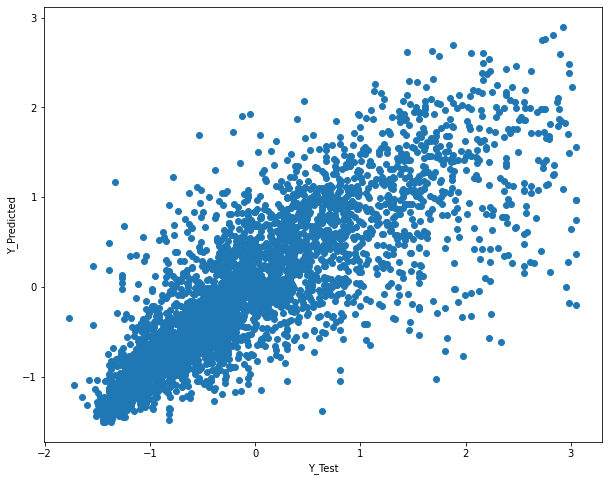

In [71]:
#print("R2 Score",r2_score(y_test,y_predict_actual))
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,knn.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

In [72]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'n_neighbors':range(3,10),
                    'metric':['canberra','euclidean','minkowski']}]
reg = GridSearchCV(KNeighborsRegressor(),
                  tuned_parameters,
                  cv = 10,
                  scoring = 'r2')
reg.fit(x_train_scaled.iloc[:,1:],y_train_scaled)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': range(3, 10)}],
             scoring='r2')

In [73]:
reg.best_score_

0.6824815431505135

In [74]:
reg.best_params_

{'metric': 'euclidean', 'n_neighbors': 9}

In [75]:
reg.get_params()['estimator']

KNeighborsRegressor()

In [76]:
knn = KNeighborsRegressor(n_neighbors = 9,metric = 'euclidean').fit(x_train_scaled.iloc[:,1:],y_train_scaled)

In [77]:
print(f"Value for Train Data Set {r2_score(knn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled)}")
print(f"Value for Test Data Set {r2_score(knn.predict(x_test_scaled),y_test_scaled)}")

Value for Train Data Set 0.6369561026171495
Value for Test Data Set 0.5403862604298488


### Tree based models for Regression

In [78]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 1,max_depth = 6)
reg.fit(x_train_scaled.iloc[:,1:],y_train_scaled)

DecisionTreeRegressor(max_depth=6, random_state=1)

In [79]:
y_pred_train = reg.predict(x_train_scaled.iloc[:,1:])
print(r2_score(y_train_scaled,y_pred_train))
y_pred_test = reg.predict(x_test_scaled)
print(r2_score(y_test_scaled, y_pred_test))

0.6473114183131939
0.6146961325384339


In [80]:
tuned_parameters = [{'max_depth':range(2,30)}]
DTR = GridSearchCV(DecisionTreeRegressor(),
                  tuned_parameters,
                  cv = 10)
DTR.fit(x_train_scaled.iloc[:,1:],y_train_scaled)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': range(2, 30)}])

In [81]:
print(DTR.best_score_)
print(DTR.best_params_)

0.658619206906488
{'max_depth': 10}


In [82]:
DTRF = DecisionTreeRegressor(random_state = 1, max_depth = 9)
DTRF.fit(x_train_scaled.iloc[:,1:],y_train_scaled)
y_pred_train = DTRF.predict(x_train_scaled.iloc[:,1:])
print(r2_score(y_train_scaled,y_pred_train))

y_pred_test = DTRF.predict(x_test_scaled)
print(r2_score(y_test_scaled, y_pred_test))

0.7630840513645432
0.6467800070754968


## Ensemble Models
### Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
rfr = RandomForestRegressor(max_depth = 3).fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

In [85]:
print("R2 Score",round(r2_score(y_train_scaled,rfr.predict(x_train_scaled.iloc[:,1:]))))
print("R2 Score",round(r2_score(y_test_scaled,rfr.predict(x_test_scaled)),3))

R2 Score 1
R2 Score 0.54


In [86]:
tuned_parameters = {'max_depth': [2,30],
                    'n_estimators' : [10,20,30],
                    'max_features' : [1,'sqrt','log2'],
                    'bootstrap':['False','True']}
RFR = GridSearchCV(RandomForestRegressor(),
                  tuned_parameters,
                  cv = 10,
                  scoring = 'r2')
RFR.fit( x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': ['False', 'True'], 'max_depth': [2, 30],
                         'max_features': [1, 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30]},
             scoring='r2')

In [87]:
RFR.best_params_

{'bootstrap': 'True',
 'max_depth': 30,
 'max_features': 'log2',
 'n_estimators': 30}

In [88]:
RFR.best_score_

0.7690930274346138

In [89]:
rfr1 = RandomForestRegressor(max_depth = 30, n_estimators = 30, max_features = 'log2',bootstrap = True)
rfr1.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

RandomForestRegressor(max_depth=30, max_features='log2', n_estimators=30)

In [90]:
train_predict = rfr1.predict(x_train_scaled.iloc[:,1:])
print(r2_score(train_predict,y_train_scaled))
test_predict = rfr1.predict(x_test_scaled)
print(r2_score(test_predict, y_test_scaled))

0.9584090039901293
0.6329946612507382


### Gradient Boosting Regressor

In [91]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 400,verbose = 1).fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

      Iter       Train Loss   Remaining Time 
         1           0.8992            9.87s
         2           0.8173            9.78s
         3           0.7500            9.72s
         4           0.6951            9.67s
         5           0.6496            9.59s
         6           0.6111            9.51s
         7           0.5796            9.47s
         8           0.5530            9.44s
         9           0.5305            9.43s
        10           0.5116            9.43s
        20           0.4132            9.13s
        30           0.3631            8.84s
        40           0.3309            8.57s
        50           0.3084            8.31s
        60           0.2954            8.07s
        70           0.2839            7.82s
        80           0.2722            7.57s
        90           0.2599            7.33s
       100           0.2504            7.09s
       200           0.2036            4.71s
       300           0.1812            2.35s
       40

In [92]:
print("R2 Score Test:",round(r2_score(y_test_scaled,gbr.predict(x_test_scaled)),3))
print("R2 Score Train:",round(r2_score(y_train_scaled, gbr.predict(x_train_scaled.iloc[:,1:])),3))

R2 Score Test: 0.774
R2 Score Train: 0.833


In [93]:
tuned_parameter = [{'n_estimators': [300,500],
                   'criterion':['friedman_mse','squared_error'],
                   'max_features':[1,'sqrt','log2'],
                   'max_depth':[2,10],
                   'verbose':[1]}]
GBR = GridSearchCV(GradientBoostingRegressor(),
                  tuned_parameter,
                  cv=10,
                  scoring = 'r2')
GBR.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

      Iter       Train Loss   Remaining Time 
         1           1.0010            0.51s
         2           0.9492            0.52s
         3           0.9426            0.50s
         4           0.9140            0.52s
         5           0.9074            0.61s
         6           0.8950            0.61s
         7           0.8880            0.57s
         8           0.8498            0.56s
         9           0.8236            0.58s
        10           0.8215            0.59s
        20           0.6600            0.55s
        30           0.5759            0.52s
        40           0.5321            0.49s
        50           0.4909            0.47s
        60           0.4638            0.44s
        70           0.4317            0.43s
        80           0.4163            0.42s
        90           0.4036            0.40s
       100           0.3911            0.37s
       200           0.3270            0.19s
       300           0.3008            0.00s
      Ite

         8           0.8263            0.57s
         9           0.7883            0.59s
        10           0.7849            0.58s
        20           0.6345            0.55s
        30           0.5688            0.50s
        40           0.4987            0.48s
        50           0.4603            0.45s
        60           0.4376            0.43s
        70           0.4152            0.42s
        80           0.3989            0.40s
        90           0.3866            0.38s
       100           0.3795            0.35s
       200           0.3127            0.18s
       300           0.2879            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9490            0.62s
         2           0.9424            0.49s
         3           0.9286            0.57s
         4           0.9266            0.59s
         5           0.9257            0.57s
         6           0.8776            0.59s
         7           0.8386            0.58s
         

         8           0.8451            0.81s
         9           0.8436            0.77s
        10           0.8378            0.73s
        20           0.6796            0.81s
        30           0.5902            0.82s
        40           0.5172            0.82s
        50           0.4804            0.81s
        60           0.4652            0.78s
        70           0.4388            0.77s
        80           0.4140            0.75s
        90           0.4071            0.72s
       100           0.3901            0.71s
       200           0.3196            0.55s
       300           0.2918            0.36s
       400           0.2746            0.18s
       500           0.2638            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9836            0.66s
         2           0.9712            0.87s
         3           0.9605            0.98s
         4           0.9576            0.80s
         5           0.9533            0.81s
         

        50           0.3971            1.02s
        60           0.3758            0.98s
        70           0.3622            0.94s
        80           0.3506            0.90s
        90           0.3403            0.87s
       100           0.3330            0.82s
       200           0.2801            0.40s
       300           0.2571            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9477            1.26s
         2           0.9044            1.14s
         3           0.8541            1.28s
         4           0.8171            1.33s
         5           0.7885            1.22s
         6           0.7678            1.19s
         7           0.7404            1.21s
         8           0.7095            1.25s
         9           0.6936            1.23s
        10           0.6872            1.25s
        20           0.5335            1.21s
        30           0.4683            1.15s
        40           0.4284            1.09s
        5

       200           0.2810            1.20s
       300           0.2592            0.80s
       400           0.2437            0.40s
       500           0.2323            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9618            2.01s
         2           0.9033            2.17s
         3           0.8551            2.18s
         4           0.8359            2.05s
         5           0.8220            2.09s
         6           0.7891            2.00s
         7           0.7511            2.01s
         8           0.7446            1.98s
         9           0.7199            1.85s
        10           0.7123            1.81s
        20           0.5870            1.81s
        30           0.4825            1.89s
        40           0.4268            1.84s
        50           0.3975            1.77s
        60           0.3750            1.73s
        70           0.3574            1.70s
        80           0.3439            1.68s
        9

        50           0.4104            0.99s
        60           0.3845            0.96s
        70           0.3665            0.92s
        80           0.3550            0.88s
        90           0.3469            0.84s
       100           0.3354            0.80s
       200           0.2814            0.40s
       300           0.2580            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9431            1.32s
         2           0.8974            1.23s
         3           0.8528            1.13s
         4           0.8222            1.12s
         5           0.7820            1.22s
         6           0.7602            1.27s
         7           0.7495            1.27s
         8           0.7158            1.30s
         9           0.6756            1.33s
        10           0.6481            1.31s
        20           0.5071            1.22s
        30           0.4460            1.14s
        40           0.4071            1.08s
        5

       200           0.2830            0.39s
       300           0.2605            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9659            1.03s
         2           0.9138            1.13s
         3           0.8999            1.18s
         4           0.8719            1.12s
         5           0.8644            1.10s
         6           0.8260            1.14s
         7           0.8105            1.14s
         8           0.7835            1.14s
         9           0.7542            1.13s
        10           0.7192            1.16s
        20           0.5452            1.16s
        30           0.4759            1.06s
        40           0.4335            1.02s
        50           0.4000            0.96s
        60           0.3730            0.93s
        70           0.3573            0.89s
        80           0.3432            0.83s
        90           0.3347            0.80s
       100           0.3230            0.77s
       20

        50           0.3900            1.80s
        60           0.3727            1.75s
        70           0.3571            1.73s
        80           0.3453            1.67s
        90           0.3380            1.65s
       100           0.3327            1.59s
       200           0.2870            1.19s
       300           0.2605            0.80s
       400           0.2446            0.40s
       500           0.2337            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9423            1.33s
         2           0.8889            1.75s
         3           0.8772            1.87s
         4           0.8396            1.88s
         5           0.8182            1.87s
         6           0.8102            1.67s
         7           0.7677            1.79s
         8           0.7590            1.73s
         9           0.7373            1.68s
        10           0.7055            1.72s
        20           0.5292            1.97s
        3

        50           0.0826            2.17s
        60           0.0700            2.08s
        70           0.0599            1.98s
        80           0.0517            1.89s
        90           0.0463            1.81s
       100           0.0410            1.72s
       200           0.0128            0.85s
       300           0.0046            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8992            2.93s
         2           0.7958            2.82s
         3           0.7201            2.73s
         4           0.6477            2.70s
         5           0.5781            2.59s
         6           0.5238            2.60s
         7           0.4857            2.54s
         8           0.4456            2.51s
         9           0.4154            2.49s
        10           0.3828            2.49s
        20           0.2024            2.44s
        30           0.1405            2.35s
        40           0.1060            2.27s
        5

        80           0.0506            3.60s
        90           0.0447            3.50s
       100           0.0391            3.42s
       200           0.0131            2.54s
       300           0.0049            1.69s
       400           0.0018            0.85s
       500           0.0007            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9036            3.95s
         2           0.8152            4.04s
         3           0.7315            4.01s
         4           0.6598            4.15s
         5           0.5908            4.20s
         6           0.5375            4.20s
         7           0.5000            4.17s
         8           0.4638            4.22s
         9           0.4305            4.19s
        10           0.3931            4.16s
        20           0.2072            4.15s
        30           0.1362            4.10s
        40           0.1062            3.96s
        50           0.0871            3.87s
        6

         9           0.3109            5.33s
        10           0.2824            5.33s
        20           0.1288            5.10s
        30           0.0827            4.89s
        40           0.0604            4.71s
        50           0.0464            4.52s
        60           0.0382            4.34s
        70           0.0316            4.17s
        80           0.0267            4.00s
        90           0.0233            3.80s
       100           0.0192            3.63s
       200           0.0050            1.82s
       300           0.0016            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8636            5.47s
         2           0.7488            5.12s
         3           0.6525            5.22s
         4           0.5706            5.35s
         5           0.5055            5.34s
         6           0.4446            5.40s
         7           0.3958            5.27s
         8           0.3544            5.33s
         

        70           0.0354            4.19s
        80           0.0300            3.99s
        90           0.0259            3.79s
       100           0.0227            3.62s
       200           0.0058            1.81s
       300           0.0017            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8553            5.89s
         2           0.7449            5.35s
         3           0.6473            5.43s
         4           0.5637            5.44s
         5           0.4946            5.51s
         6           0.4397            5.44s
         7           0.3882            5.45s
         8           0.3447            5.39s
         9           0.3078            5.38s
        10           0.2775            5.39s
        20           0.1341            5.09s
        30           0.0874            4.92s
        40           0.0643            4.70s
        50           0.0508            4.54s
        60           0.0427            4.39s
        7

        10           0.2882            8.67s
        20           0.1340            8.38s
        30           0.0858            8.35s
        40           0.0647            8.21s
        50           0.0512            8.06s
        60           0.0412            7.92s
        70           0.0340            7.74s
        80           0.0293            7.54s
        90           0.0252            7.42s
       100           0.0209            7.24s
       200           0.0057            5.44s
       300           0.0018            3.64s
       400           0.0006            1.82s
       500           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8714            8.03s
         2           0.7561            8.65s
         3           0.6534            9.14s
         4           0.5721            8.93s
         5           0.5027            8.99s
         6           0.4442            9.11s
         7           0.3935            9.07s
         

        10           0.2864            5.13s
        20           0.1351            5.00s
        30           0.0895            4.84s
        40           0.0652            4.67s
        50           0.0500            4.55s
        60           0.0398            4.36s
        70           0.0327            4.18s
        80           0.0284            4.01s
        90           0.0239            3.84s
       100           0.0206            3.64s
       200           0.0054            1.83s
       300           0.0016            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8697            5.32s
         2           0.7495            5.46s
         3           0.6555            5.44s
         4           0.5729            5.46s
         5           0.5052            5.32s
         6           0.4472            5.34s
         7           0.3971            5.31s
         8           0.3525            5.31s
         9           0.3181            5.29s
        1

        30           0.0874            8.56s
        40           0.0640            8.38s
        50           0.0509            8.21s
        60           0.0419            7.99s
        70           0.0354            7.79s
        80           0.0298            7.60s
        90           0.0253            7.44s
       100           0.0208            7.26s
       200           0.0056            5.47s
       300           0.0017            3.64s
       400           0.0005            1.82s
       500           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8664            9.45s
         2           0.7564            8.89s
         3           0.6564            9.06s
         4           0.5679            9.12s
         5           0.4980            9.08s
         6           0.4398            9.19s
         7           0.3898            9.10s
         8           0.3484            9.11s
         9           0.3157            9.10s
        1

        90           0.3943            0.38s
       100           0.3818            0.37s
       200           0.3223            0.18s
       300           0.2911            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9867            0.33s
         2           0.9803            0.39s
         3           0.9671            0.42s
         4           0.9561            0.47s
         5           0.8778            0.48s
         6           0.8450            0.48s
         7           0.8387            0.50s
         8           0.8250            0.51s
         9           0.8196            0.52s
        10           0.7935            0.49s
        20           0.6884            0.48s
        30           0.5887            0.45s
        40           0.5493            0.45s
        50           0.5204            0.44s
        60           0.5067            0.41s
        70           0.4753            0.39s
        80           0.4518            0.37s
        9

         2           0.8987            0.85s
         3           0.8937            0.78s
         4           0.8921            0.69s
         5           0.8476            0.58s
         6           0.8412            0.55s
         7           0.8148            0.54s
         8           0.8036            0.53s
         9           0.8000            0.50s
        10           0.7941            0.47s
        20           0.6984            0.45s
        30           0.5992            0.46s
        40           0.5675            0.45s
        50           0.5088            0.43s
        60           0.4624            0.41s
        70           0.4314            0.39s
        80           0.4109            0.38s
        90           0.3983            0.35s
       100           0.3837            0.34s
       200           0.3172            0.18s
       300           0.2899            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9737            1.26s
         

       200           0.3350            0.51s
       300           0.2985            0.34s
       400           0.2776            0.17s
       500           0.2664            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9880            1.14s
         2           0.9499            1.12s
         3           0.9492            0.99s
         4           0.9402            1.08s
         5           0.8874            1.11s
         6           0.8783            1.04s
         7           0.8756            0.94s
         8           0.8663            0.97s
         9           0.8607            0.98s
        10           0.8500            0.99s
        20           0.7366            0.89s
        30           0.6151            0.87s
        40           0.5492            0.83s
        50           0.4915            0.81s
        60           0.4738            0.78s
        70           0.4412            0.77s
        80           0.4152            0.76s
        9

       200           0.2853            0.40s
       300           0.2620            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9779            0.68s
         2           0.9312            0.83s
         3           0.8836            0.88s
         4           0.8698            1.00s
         5           0.8293            1.08s
         6           0.7975            1.03s
         7           0.7427            1.09s
         8           0.7346            1.07s
         9           0.6988            1.11s
        10           0.6722            1.13s
        20           0.5451            1.13s
        30           0.4620            1.04s
        40           0.4105            1.03s
        50           0.3854            0.99s
        60           0.3678            0.95s
        70           0.3548            0.90s
        80           0.3433            0.88s
        90           0.3341            0.85s
       100           0.3263            0.80s
       20

       400           0.2452            0.42s
       500           0.2332            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9506            1.92s
         2           0.8740            2.11s
         3           0.8335            2.22s
         4           0.8002            2.25s
         5           0.7623            2.09s
         6           0.7337            2.01s
         7           0.7091            2.07s
         8           0.6805            1.98s
         9           0.6535            2.06s
        10           0.6243            2.02s
        20           0.5162            2.04s
        30           0.4448            1.98s
        40           0.4103            1.88s
        50           0.3892            1.82s
        60           0.3738            1.76s
        70           0.3609            1.70s
        80           0.3480            1.66s
        90           0.3405            1.62s
       100           0.3316            1.59s
       20

        50           0.3902            1.05s
        60           0.3742            1.03s
        70           0.3589            0.98s
        80           0.3488            0.92s
        90           0.3418            0.88s
       100           0.3347            0.84s
       200           0.2813            0.41s
       300           0.2542            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9643            1.67s
         2           0.9348            1.30s
         3           0.8859            1.38s
         4           0.8278            1.32s
         5           0.8069            1.30s
         6           0.7497            1.33s
         7           0.7181            1.32s
         8           0.6790            1.34s
         9           0.6547            1.32s
        10           0.6236            1.32s
        20           0.5030            1.25s
        30           0.4409            1.15s
        40           0.4103            1.10s
        5

       200           0.2805            0.40s
       300           0.2567            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9302            1.65s
         2           0.9198            1.24s
         3           0.8696            1.26s
         4           0.8193            1.28s
         5           0.8111            1.27s
         6           0.7758            1.19s
         7           0.7597            1.20s
         8           0.7503            1.12s
         9           0.7309            1.14s
        10           0.7245            1.15s
        20           0.5904            1.08s
        30           0.4838            1.07s
        40           0.4329            1.03s
        50           0.3953            1.00s
        60           0.3752            0.95s
        70           0.3533            0.90s
        80           0.3416            0.86s
        90           0.3316            0.82s
       100           0.3247            0.79s
       20

        50           0.3956            1.84s
        60           0.3774            1.77s
        70           0.3650            1.72s
        80           0.3518            1.69s
        90           0.3441            1.64s
       100           0.3363            1.60s
       200           0.2834            1.20s
       300           0.2597            0.80s
       400           0.2451            0.40s
       500           0.2352            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9348            2.16s
         2           0.8703            2.61s
         3           0.8367            2.63s
         4           0.7961            2.20s
         5           0.7448            2.18s
         6           0.7137            2.16s
         7           0.6953            2.17s
         8           0.6864            2.11s
         9           0.6622            2.03s
        10           0.6411            2.01s
        20           0.5007            1.99s
        3

        50           0.0866            2.15s
        60           0.0716            2.05s
        70           0.0612            1.96s
        80           0.0532            1.87s
        90           0.0470            1.78s
       100           0.0414            1.69s
       200           0.0133            0.84s
       300           0.0049            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8943            2.60s
         2           0.7846            2.69s
         3           0.6965            2.66s
         4           0.6224            2.67s
         5           0.5652            2.61s
         6           0.5236            2.59s
         7           0.4785            2.59s
         8           0.4401            2.58s
         9           0.4078            2.58s
        10           0.3736            2.59s
        20           0.1981            2.46s
        30           0.1329            2.34s
        40           0.1030            2.24s
        5

        80           0.0543            3.50s
        90           0.0476            3.42s
       100           0.0421            3.33s
       200           0.0135            2.51s
       300           0.0049            1.68s
       400           0.0020            0.84s
       500           0.0008            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8837            4.58s
         2           0.7937            4.32s
         3           0.7066            4.36s
         4           0.6396            4.47s
         5           0.5783            4.44s
         6           0.5241            4.36s
         7           0.4759            4.34s
         8           0.4284            4.37s
         9           0.3940            4.36s
        10           0.3621            4.34s
        20           0.1895            4.25s
        30           0.1324            4.08s
        40           0.1002            3.97s
        50           0.0809            3.89s
        6

         9           0.3200            5.17s
        10           0.2905            5.17s
        20           0.1342            5.06s
        30           0.0845            4.88s
        40           0.0627            4.76s
        50           0.0488            4.60s
        60           0.0390            4.44s
        70           0.0331            4.24s
        80           0.0282            4.06s
        90           0.0246            3.90s
       100           0.0206            3.69s
       200           0.0052            1.84s
       300           0.0016            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8584            5.89s
         2           0.7445            5.36s
         3           0.6522            5.26s
         4           0.5725            5.21s
         5           0.5084            5.21s
         6           0.4509            5.17s
         7           0.4079            5.20s
         8           0.3657            5.24s
         

        70           0.0334            4.19s
        80           0.0285            4.01s
        90           0.0246            3.83s
       100           0.0206            3.63s
       200           0.0052            1.81s
       300           0.0016            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8556            5.20s
         2           0.7419            5.59s
         3           0.6464            5.56s
         4           0.5648            5.43s
         5           0.4946            5.38s
         6           0.4360            5.43s
         7           0.3874            5.40s
         8           0.3463            5.39s
         9           0.3090            5.34s
        10           0.2800            5.27s
        20           0.1316            5.09s
        30           0.0858            4.95s
        40           0.0638            4.77s
        50           0.0512            4.55s
        60           0.0416            4.37s
        7

        30           0.0852            8.53s
        40           0.0621            8.42s
        50           0.0490            8.21s
        60           0.0403            8.05s
        70           0.0341            7.87s
        80           0.0285            7.66s
        90           0.0242            7.49s
       100           0.0206            7.31s
       200           0.0061            5.42s
       300           0.0018            3.64s
       400           0.0006            1.82s
       500           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8624            8.56s
         2           0.7450            9.37s
         3           0.6454            9.55s
         4           0.5697            9.41s
         5           0.5060            9.22s
         6           0.4451            9.27s
         7           0.3958            8.99s
         8           0.3562            8.91s
         9           0.3192            9.02s
        1

        10           0.2867            5.35s
        20           0.1377            5.23s
        30           0.0870            5.04s
        40           0.0640            4.82s
        50           0.0505            4.65s
        60           0.0415            4.48s
        70           0.0345            4.26s
        80           0.0290            4.05s
        90           0.0246            3.86s
       100           0.0205            3.67s
       200           0.0051            1.83s
       300           0.0016            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8692            5.47s
         2           0.7568            5.76s
         3           0.6610            5.78s
         4           0.5756            5.72s
         5           0.5052            5.69s
         6           0.4466            5.71s
         7           0.3979            5.68s
         8           0.3567            5.62s
         9           0.3201            5.57s
        1

        30           0.0871            8.46s
        40           0.0642            8.19s
        50           0.0507            8.06s
        60           0.0401            7.91s
        70           0.0340            7.73s
        80           0.0286            7.55s
        90           0.0241            7.40s
       100           0.0208            7.27s
       200           0.0057            5.44s
       300           0.0017            3.64s
       400           0.0006            1.82s
       500           0.0002            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8621            9.59s
         2           0.7436            9.09s
         3           0.6454            9.26s
         4           0.5596            9.29s
         5           0.4930            9.10s
         6           0.4341            9.19s
         7           0.3872            9.03s
         8           0.3442            8.93s
         9           0.3107            8.89s
        1

         8           0.3542           10.28s
         9           0.3185           10.17s
        10           0.2896           10.10s
        20           0.1385            9.73s
        30           0.0906            9.48s
        40           0.0693            9.29s
        50           0.0551            9.17s
        60           0.0457            8.96s
        70           0.0380            8.75s
        80           0.0325            8.60s
        90           0.0278            8.38s
       100           0.0237            8.17s
       200           0.0067            6.09s
       300           0.0021            4.05s
       400           0.0007            2.03s
       500           0.0003            0.00s


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid=[{'criterion': ['friedman_mse', 'squared_error'],
                          'max_depth': [2, 10],
                          'max_features': [1, 'sqrt', 'log2'],
                          'n_estimators': [300, 500], 'verbose': [1]}],
             scoring='r2')

In [94]:
GBR.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 500,
 'verbose': 1}

In [95]:
GBR.best_score_

0.8037487695301617

In [96]:
gbr1 = GradientBoostingRegressor(n_estimators = 500,
                                max_depth = 10,
                                max_features = 'log2',
                                criterion = 'squared_error',verbose = 1)
gbr1.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

      Iter       Train Loss   Remaining Time 
         1           0.8645           11.58s
         2           0.7564           11.85s
         3           0.6597           11.01s
         4           0.5795           10.71s
         5           0.5144           10.46s
         6           0.4564           10.44s
         7           0.4070           10.41s
         8           0.3656           10.41s
         9           0.3291           10.35s
        10           0.2979           10.41s
        20           0.1474            9.97s
        30           0.0950            9.63s
        40           0.0699            9.37s
        50           0.0550            9.17s
        60           0.0467            8.94s
        70           0.0387            8.70s
        80           0.0330            8.49s
        90           0.0290            8.29s
       100           0.0246            8.11s
       200           0.0069            6.11s
       300           0.0023            4.04s
       40

GradientBoostingRegressor(criterion='squared_error', max_depth=10,
                          max_features='log2', n_estimators=500, verbose=1)

In [97]:
print("Train R2",r2_score(gbr1.predict(x_train_scaled.iloc[:,1:]),y_train_scaled))
print("Test R2",r2_score(gbr1.predict(x_test_scaled),y_test_scaled))

Train R2 0.9997055696085058
Test R2 0.7165710819203623


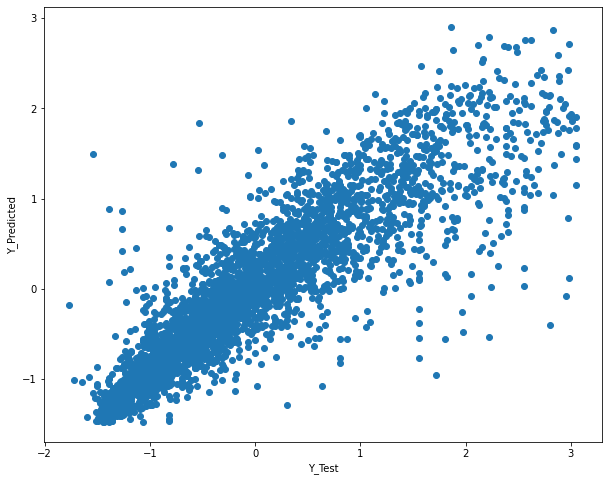

In [98]:
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,gbr1.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

### Support Vector Regression

In [99]:
from sklearn.svm import SVR
from sklearn.svm import SVC
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

SVR()

In [100]:
train_predict = regressor.predict(x_train_scaled.iloc[:,1:])
print("Train R2: ", r2_score(train_predict,y_train_scaled))
test_predict = regressor.predict(x_test_scaled)
print("Test R2: ",r2_score(y_test_scaled, test_predict))

Train R2:  0.624199112328814
Test R2:  0.728205429046479


In [101]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [104]:
#parameter_list = {'C':[0.1,1,10,100],
                  'gamma':[1,0.1,0.01,0.001],
                  'kernel':['rbf','poly','sigmoid','linear'],
                 'verbose':[1]}

#SVR_1 = HalvingGridSearchCV(SVR(),
                            parameter_list, 
                            cv = 5, 
                            scoring = 'r2',
                            n_jobs = -1, 
                            verbose = 5)
#SVR_1.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 524
max_resources_: 14157
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 64
n_resources: 524
Fitting 5 folds for each of 64 candidates, totalling 320 fits
*
optimization finished, #iter = 223
obj = -25.210175, rho = 0.066842
nSV = 376, nBSV = 342
..*
optimization finished, #iter = 221
obj = -23.388043, rho = 0.183653
nSV = 375, nBSV = 342
..*
optimization finished, #iter = 224
obj = -24.045586, rho = 0.218782
nSV = 370, nBSV = 328
*
optimization finished, #iter = 215
obj = -23.456588, rho = 0.158628
nSV = 365, nBSV = 333
*
optimization finished, #iter = 219
obj = -24.481838, rho = 0.250228
nSV = 376, nBSV = 341
................................................................................*
optimization finished, #iter = 334
obj = -81.722889, rho = 0.701446
nSV = 413, nBSV = 410
......*
optimization finished, #iter = 334
obj = -72.326459, rho = 0.541816
nSV = 414, nBSV = 412
...

.obj = -8000.850372, rho = -0.718225
nSV = 419, nBSV = 416
.......*.......*
optimization finished, #iter = 14361
obj = -141.583187, rho = 0.011521
nSV = 345, nBSV = 331
.......*
optimization finished, #iter = 545
obj = -129.839042, rho = 0.032377
nSV = 340, nBSV = 288
........*
optimization finished, #iter = 2471
obj = -175.860932, rho = 0.110988
nSV = 355, nBSV = 317
...........*
optimization finished, #iter = 310
obj = -851.551623, rho = 1.043357
nSV = 405, nBSV = 400
.......*
optimization finished, #iter = 6039
.obj = -169.977276, rho = 0.060919
nSV = 348, nBSV = 301
............................*
optimization finished, #iter = 520
obj = -137.543406, rho = -0.150820
nSV = 336, nBSV = 283
........*
optimization finished, #iter = 281
obj = -169.220146, rho = -0.644378
nSV = 354, nBSV = 340
..*
optimization finished, #iter = 381
obj = -720.191267, rho = 0.905018
nSV = 411, nBSV = 405
...............*
optimization finished, #iter = 391
obj = -498.955455, rho = 0.639223
nSV = 401, nBSV = 

................................................................................................................................................*
optimization finished, #iter = 1147
.obj = -1351.410420, rho = -1.681110
nSV = 338, nBSV = 308
.....................................................................*
optimization finished, #iter = 553
obj = -3401.568257, rho = 0.227148
nSV = 367, nBSV = 357
..................................................*............................*.........................*.
optimization finished, #iter = 1137
obj = -1489.957363, rho = -0.648907
*nSV = 352, nBSV = 325
.....*.....................*.*
optimization finished, #iter = 879
obj = -3154.416251, rho = 0.094783
nSV = 358, nBSV = 349
.........................*
optimization finished, #iter = 45397
obj = -1350.091771, rho = 0.097535
nSV = 358, nBSV = 277
.......................................................................*..................*.
optimization finished, #iter = 483
.obj = -1576.832065, 

.....................................................................................................................*............................................................................................................................................................................................*..................*.............................................................................................................................*.................................................................................................................*................................................................................................................................................................................................................................................*
optimization finished, #iter = 300947
obj = -1577.191347, rho = -0.057938
nSV = 369, nBSV = 357
................................................................................................

...........*...................................*......................................................................................................................................................................................*
optimization finished, #iter = 331
obj = -6431919.469540, rho = 150.192313
nSV = 419, nBSV = 414
.....................................................................................................................................................................................................................................................*
optimization finished, #iter = 408
.obj = -8561245.502412, rho = 115.973621
nSV = 419, nBSV = 413
............................................................................................................................................................................................*........................................*
optimization finished, #iter = 363
obj = -4644457.638659, rho = -87.371845
nSV = 418, nBSV = 41

.................................*....*.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.........................................................................................................................................................................................................................................................................................................

..........................................................................................*................................................................................................................................................................................................................................................................................................*
optimization finished, #iter = 206
obj = -28182.816399, rho = 0.202582
nSV = 388, nBSV = 386
........................................
*..*
optimization finished, #iter = 1809
obj = -13543.275576, rho = -3.338129
nSV = 346, nBSV = 330
........................................................................................................................................................................................................................................................*..........................................................................................................*
optimization finished, #iter

.............................................................................................................................................................................................................................................................................................................................................................................................................................................................*..........................................................................................................................................................................................................................................................................................................................................................................................................*......................*........................................................................................................................................

.......................................................................................................*.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*......................................................................................................................................*.................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..............................................................*.........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

............................................................*...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*...............................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.....................................................................................................................................................................................................................................................................................................................................................[LibSVM][CV 1/5] END C=0.1, gamma=1, kernel=poly, verbose=1;, score=(train=0.763, test=-0.320) total time=   0.3s
[LibSVM][CV 3/5] END C=1, gamma=1, kernel=rbf, verbose=1;, score=(train=0.833, test=0.443) total time=   0.0s
[LibSVM][CV 4/5] END C=1, gamma=1, kernel=rbf, verbose=1;, score=(train=0.854, test=0.367) total time=   0.0s
[LibSVM][CV 1/5] END C=1, gamma=0.1, kernel=sigmoid, verbose=1;, score=(train=-92.061, test=-122.175) total time=   0.0s
[LibSVM][CV 2/5] END C=1, gamma=0.1, kernel=sigmoid, verbose=1;, score=(train=-157.100, test=-31.719) total time=   0.0s
[LibSVM][CV 3/5] END C=1, gamma=0.1, kernel=sigmoid, verbose=1;, score=(train=-42.4

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...............................................................................*........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.............................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.........................................................................................................................................................................................................................................................................................................................................*..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.........................................................................................................................................................................................................................................................................................................*..*.............*.......................................*.......................................................................*.....................................................*.....*..........*.........................................................................................................................................................................................*...................................................................................................................................................................................................................................*........................................................................................

nSV = 1041, nBSV = 1026
........*.....*............*................*...........*
optimization finished, #iter = 42252
obj = -453.463658, rho = -0.054155
nSV = 1030, nBSV = 1016
.........................
*.......**...*
optimization finished, #iter = 46357
obj = -436.348410, rho = -0.057928
nSV = 1033, nBSV = 1020
.....................*.........
*.......*..
**.
optimization finished, #iter = 39159
obj = -453.386809, rho = -0.052929
nSV = 1041, nBSV = 1026
............*.........*...*
optimization finished, #iter = 33213
obj = -478.151709, rho = -0.073843
nSV = 1075, nBSV = 1062
.......
*....*...........*.........*.*
optimization finished, #iter = 33213
obj = -478.151709, rho = -0.073843
nSV = 1075, nBSV = 1062
........................*...*...................*..............*...........*
optimization finished, #iter = 62145
.obj = -440.000177, rho = -0.032816
nSV = 1041, nBSV = 1030
............................................................................................................

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*.....................................................................................................................................................................................................................................................................................................................

............................................................................................................................................................*..........................................................................................................................*...........................................................*..
*.
optimization finished, #iter = 5405838
obj = -43564.184969, rho = -0.061161
nSV = 1028, nBSV = 1015
..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

...............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*....................................................................................................................................................................................*...................................................................................................................................................................................................................................................................................................................................................

...............................................................................................................................................................................................................................................................................................................................................................................................*...............................................................*...................................................................................................................................................................................................................................................................................................................................................................................................................*....................................................................................................................................................

..........................................................................................................................................................................................................................................................................*........................................................................................................................................................................................................*.....................................................................................................................*......................................................................................................................................................................................................................................................................................*......................................................................................*................................................

----------
iter: 3
n_candidates: 3
n_resources: 14148
Fitting 5 folds for each of 3 candidates, totalling 15 fits
..........................................................................
.*....*
optimization finished, #iter = 11694
...obj = -3146.018978, rho = -0.237930
nSV = 8658, nBSV = 8335
*........*..*
optimization finished, #iter = 12627
.*obj = -3153.177401, rho = -0.284729

optimization finished, #iter = 11549
nSV = 8720, nBSV = 8406
..obj = -3135.266826, rho = -0.270209
nSV = 8655, nBSV = 8360

.*....*.*
optimization finished, #iter = 12478
..obj = -3148.801132, rho = -0.441467
nSV = 8679, nBSV = 8352
.*
optimization finished, #iter = 11818
obj = -3144.735262, rho = -0.279109
nSV = 8670, nBSV = 8350
.....................................................................................................................................................................................................*..................................................................................

[LibSVM][CV 5/5] END C=0.1, gamma=0.001, kernel=linear, verbose=1;, score=(train=0.616, test=0.620) total time=   0.1s
[LibSVM][CV 3/5] END C=10, gamma=1, kernel=linear, verbose=1;, score=(train=0.583, test=0.576) total time=   0.4s
[LibSVM][CV 4/5] END C=10, gamma=1, kernel=linear, verbose=1;, score=(train=0.604, test=0.537) total time=   0.4s
[LibSVM][CV 2/5] END C=1, gamma=0.1, kernel=linear, verbose=1;, score=(train=0.567, test=0.520) total time=   0.1s
[LibSVM][CV 3/5] END C=1, gamma=0.1, kernel=linear, verbose=1;, score=(train=0.583, test=0.576) total time=   0.1s
[LibSVM][CV 3/5] END C=100, gamma=0.01, kernel=linear, verbose=1;, score=(train=0.583, test=0.576) total time=   2.7s
[LibSVM][CV 4/5] END C=100, gamma=0.01, kernel=linear, verbose=1;, score=(train=0.604, test=0.537) total time=   2.9s
[LibSVM][CV 4/5] END C=100, gamma=0.001, kernel=rbf, verbose=1;, score=(train=0.631, test=0.563) total time=   0.1s
[LibSVM][CV 5/5] END C=100, gamma=0.001, kernel=rbf, verbose=1;, score=

HalvingGridSearchCV(estimator=SVR(), n_jobs=-1,
                    param_grid={'C': [0.1, 1, 10, 100],
                                'gamma': [1, 0.1, 0.01, 0.001],
                                'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
                                'verbose': [1]},
                    scoring='r2', verbose=5)

In [123]:
SVR_1.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf', 'verbose': 1}

In [126]:
SVR_1.best_score_

0.7424985722284874

In [137]:
svrb = SVR(kernel = 'rbf',verbose = 1)
svrb.fit(x_train_scaled.iloc[:,1:],y_train_scaled.values.ravel())

[LibSVM]...........*...*
optimization finished, #iter = 14912
obj = -3843.089439, rho = -0.319478
nSV = 10754, nBSV = 10360


SVR(verbose=1)

In [136]:
train_y_pred = svrb.predict(x_train_scaled.iloc[:,1:])
print("R2 Score for Train Data Set: ",r2_score(train_y_pred, y_train_scaled.values.ravel()))
test_y_pred = svrb.predict(x_test_scaled)
print("R2 score for Test Data Set: ", r2_score(test_y_pred,y_test_scaled.values.ravel()))

R2 Score for Train Data Set:  0.35395267639464156
R2 score for Test Data Set:  0.3496836912471768


### Gaussian Process Regression

In [140]:
from sklearn.gaussian_process import GaussianProcessRegressor
greg = GaussianProcessRegressor(random_state = 1)

In [141]:
greg.fit(x_train_scaled.iloc[:,1:],y_train_scaled)

GaussianProcessRegressor(random_state=1)

In [144]:
train_y_pred = greg.predict(x_train_scaled.iloc[:,1:])
print("R2 Score for Train: ",r2_score(train_y_pred,y_train_scaled))
test_y_pred = greg.predict(x_test_scaled)
print("R2 Score for Test: ",r2_score(test_y_pred,y_test_scaled))

R2 Score for Train:  0.9999930532136593
R2 Score for Test:  -0.0001166089518422897


This doesn't seem to work properly therefore we can avoid this. 

In [72]:
import pandas as pd
data_4 = pd.read_excel("Data Sets/Data Set 4.xlsx")
data_4.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         565         259         3.8462              342200        NEAR BAY  
3         413         193         4.0368              269700        NEAR BAY  
4        1094         514         3.6591              299200        NEAR BAY

In [73]:
data_4 = data_4.loc[data_4.median_house_value != max(data_4.median_house_value),:]

In [74]:
X_variables = data_4.drop('median_house_value',axis = 1)
X_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17697 non-null  float64
 1   latitude            17697 non-null  float64
 2   housing_median_age  17697 non-null  int64  
 3   total_rooms         17697 non-null  int64  
 4   total_bedrooms      17515 non-null  float64
 5   population          17697 non-null  int64  
 6   households          17697 non-null  int64  
 7   median_income       17697 non-null  float64
 8   ocean_proximity     17697 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.4+ MB


In [75]:
mean_households = X_variables.loc[X_variables.total_bedrooms.isnull()==False,'households'].mean()
mean_bedrooms = X_variables.loc[X_variables.total_bedrooms.isnull()==False,'total_bedrooms'].mean()
print(f"Mean Households = {mean_households} and Mean total_bedrooms = {mean_bedrooms}")
print(f"Ratio of Bedrooms to Households = {mean_bedrooms/mean_households}")

Mean Households = 501.0400228375678 and Mean total_bedrooms = 539.4765058521267
Ratio of Bedrooms to Households = 1.0767133986560184


In [76]:
X_variables.loc[X_variables.total_bedrooms.isnull()==True,'total_bedrooms'] = round(data_4.
                                                                          loc[X_variables.total_bedrooms.isnull()==True,
                                                                              'households']*mean_bedrooms/mean_households,0)

In [77]:
X_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17697 entries, 0 to 18564
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17697 non-null  float64
 1   latitude            17697 non-null  float64
 2   housing_median_age  17697 non-null  int64  
 3   total_rooms         17697 non-null  int64  
 4   total_bedrooms      17697 non-null  float64
 5   population          17697 non-null  int64  
 6   households          17697 non-null  int64  
 7   median_income       17697 non-null  float64
 8   ocean_proximity     17697 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.4+ MB


In [78]:
X_variables = pd.get_dummies(X_variables,
                                columns= data_4.select_dtypes('object').columns,
                               drop_first = True)

In [79]:
from sklearn import preprocessing
import numpy as np
X = preprocessing.scale(X_variables)
Y = data_4.median_house_value
Y_mean = np.mean(Y)
print("Mean is given by",Y_mean)
Y_std = np.std(Y)
print("Standard Deviation is given by",Y_std)
#Y = preprocessing.scale(Y)

Mean is given by 192227.97626716393
Standard Deviation is given by 97735.32854192404


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(np.mean(y_test))

193158.56854990585


In [81]:
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError,mean_absolute_error
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD

In [82]:
hidden_units1 = 160
hidden_units2 = 320
hidden_units3 = 640
learning_rate = 0.01
def build_model_using_sequential():
    model = Sequential([
        InputLayer(X_train.shape[1]),
        Dense(hidden_units1,  activation = 'sigmoid'),
        Dropout(0.2),
        Dense(hidden_units2,  activation = 'tanh'),
        Dropout(0.2),
        Dense(hidden_units3,  activation = 'relu'),
        Dense(1,  activation = 'linear')
    ])
    return model

model = build_model_using_sequential()
type(model)

Metal device set to: Apple M1 Pro


2022-08-12 21:28:33.840518: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-12 21:28:33.840679: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


keras.engine.sequential.Sequential

In [83]:
X_train.shape[1]
x_train_scaled.iloc[:,1:].shape[1]

12

In [84]:
#hidden_units1 = 160
#hidden_units2 = 320
#hidden_units3 = 640
#learning_rate = 0.01
#def build_model_using_sequential():
#    model = Sequential([
#        InputLayer(x_train_scaled.iloc[:,1:].shape[1]),
#        Dense(hidden_units1, kernel_initializer = 'normal', activation = 'relu'),
#        Dropout(0.2),
#        Dense(hidden_units2, kernel_initializer = 'normal', activation = 'relu'),
#        Dropout(0.2),
#        Dense(hidden_units3, kernel_initializer = 'normal', activation = 'relu'),
#        Dense(1, kernel_initializer = 'normal', activation = 'linear')
#    ])
#    return model

#model = build_model_using_sequential()
#type(model)
#model = Sequential()
#model.add(InputLayer(x_train_scaled.iloc[:,1:].shape[1],))
#model.add(Dense(hidden_units1,kernel_initializer = 'normal', activation = 'relu'))
#model.add(Dense(hidden_units2,kernel_initializer = 'normal', activation = 'relu'), Dropout(0,2))
#model.add(Dense(hidden_units3,kernel_initializer = 'normal', activation = 'relu'))
#model.add(Dense(1,kernel_initializer = 'normal', activation = 'linear'))

In [85]:
def r_square(y_test,y_test_pred):
    from keras import backend as K
    SS_res = K.sum(K.square(y_test-y_test_pred))
    SS_tot = K.sum(K.square(y_test - K.mean(y_test)))
    return (1-(SS_res)/(SS_tot))

In [86]:
msle = MeanSquaredLogarithmicError()
model.compile(loss = MeanSquaredError(),
             optimizer = keras.optimizers.SGD(0.01),
             metrics = [r_square])

NameError: name 'keras' is not defined

In [106]:
history = model.fit(X_train, 
                    y_train, 
                    epochs = 100,  
                   validation_data = (X_test, y_test))

Epoch 1/100
  1/388 [..............................] - ETA: 2:28 - loss: 48128385024.0000 - r_square: -5.8354

2022-08-10 17:44:44.222408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


388/388 [==============================] - ETA: 0s - loss: nan - r_square: nan

2022-08-10 17:44:46.672770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


388/388 [==============================] - 3s 7ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 2/100
388/388 [==============================] - 3s 7ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 3/100
388/388 [==============================] - 3s 7ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 4/100
388/388 [==============================] - 3s 7ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 5/100
388/388 [==============================] - 3s 7ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 6/100
388/388 [==============================] - 3s 7ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 7/100
388/388 [==============================] - 3s 7ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 8/100
 85/388 [=====>........................] - ETA: 1s - loss: nan - r_square: nan

KeyboardInterrupt: 

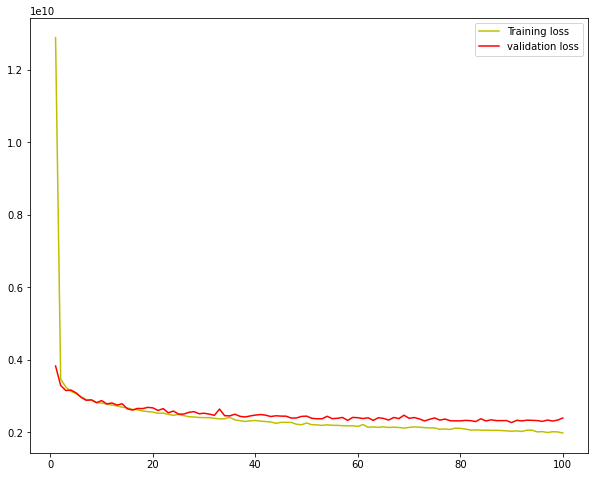

In [70]:
#Loss v/s epochs plot
loss = history.history['loss']
plt.figure(figsize = (10,8))
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.legend( loc ='best')

plt.show()

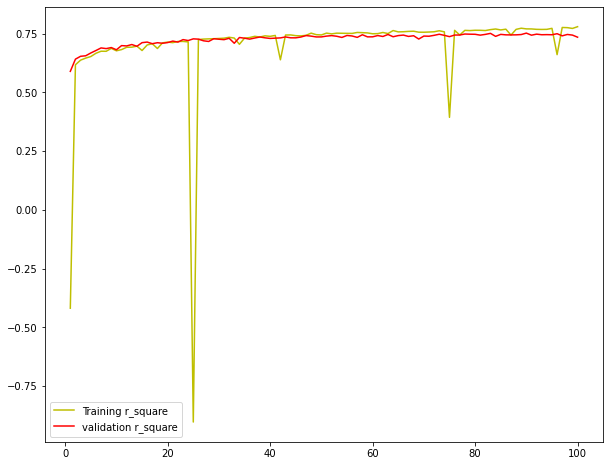

In [71]:
#R_square v/s epochs plot
plt.figure(figsize = (10,8))
r_square = history.history['r_square']
val_r_square = history.history['val_r_square']
epochs = range(1,len(loss)+1)
plt.plot(epochs, r_square, 'y', label='Training r_square')
plt.plot(epochs, val_r_square, 'r', label='validation r_square')
plt.legend(loc ='best')
plt.show()

In [72]:
#Predictions on input test and train
y_predtest = history.model.predict(X_test)
y_predtrain = history.model.predict(X_train)
y_predtest

2022-08-10 08:21:41.888267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[461463.25],
       [301391.9 ],
       [367459.  ],
       ...,
       [324829.3 ],
       [210177.48],
       [382361.97]], dtype=float32)

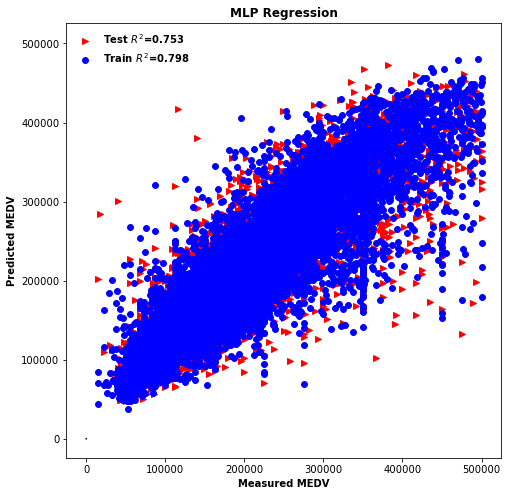

In [73]:
#A scatter plot with a metric r_square
from sklearn.metrics import r2_score,mean_squared_error
plt.figure(figsize = (8,8))
plt.plot([-2,4],[-2,4],color='black')
plt.scatter(y_test,y_predtest , s=35, color='red',marker='>',label='Test $R^{2}$=''%.3f'%r2_score(y_test,y_predtest),alpha=1)
plt.scatter(y_train, y_predtrain,    s=35, color='blue',marker='o',label='Train $R^{2}$=''%.3f'%r2_score(y_train,y_predtrain),alpha=1 )

plt.xlim(0,60)
plt.ylim(0,60)
plt.legend(frameon=False,prop={'weight':'bold'})
plt.xlabel('Measured MEDV',fontweight='bold')
plt.ylabel('Predicted MEDV',fontweight='bold')
plt.title('MLP Regression',fontweight='bold')
plt.axis('square')

#plt.savefig('NN.pdf', dpi=5000)   # Save the plot in pdf
plt.show()

In [74]:
#Conversion of array to list
def ndarray_series(y_predtest):
    list1 = []
    for i in y_predtest:
        list1.append(i[0])
    return list1

In [75]:
y_predtrain =  ndarray_series(y_predtrain)
y_predtest =  ndarray_series(y_predtest)

In [76]:
y_test*Y_std + Y_mean

10331    4.668836e+10
14518    3.955368e+10
16563    3.047407e+10
3601     3.305428e+10
11160    1.947884e+10
             ...     
3839     4.398109e+10
4341     1.221711e+10
15063    2.858778e+10
727      1.942020e+10
8372     3.909432e+10
Name: median_house_value, Length: 5310, dtype: float64

In [77]:
def un_standard(y_test,Y_mean,Y_std):
    list1 = []
    for i in y_test:
        list1.append(i*Y_std + Y_mean)
    return list1

In [78]:
y_trainunstd = un_standard(y_predtrain,Y_mean,Y_std)
y_testunstd = un_standard(y_predtest,Y_mean,Y_std)

In [79]:
#Some important metrics for our trained model for train and test set
from math import sqrt
print('parameter for train')
print('mean_squared_error:', mean_squared_error(y_train,y_predtrain))
print('mean_absolute_error:',mean_absolute_error(y_train,y_predtrain))
print('root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('MPAE:',np.mean(np.abs((y_train - y_predtrain) / y_train)) * 100)
print('\nR2 value_train:',r2_score(y_train,y_predtrain))

print('\nparameter for testing')
print('mean_squared_error:', mean_squared_error(y_test,y_predtest))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predtest))
print('root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))
print('MPAE:',np.mean(np.abs((y_test - y_predtest) / y_test)) * 100)
print('\nR2 value_test:',r2_score(y_test,y_predtest))

parameter for train
mean_squared_error: 1914588558.1816733
mean_absolute_error: tf.Tensor(31645.031, shape=(), dtype=float32)
root mean squared error: 43756.01168047282
MPAE: 19.7890977041043

R2 value_train: 0.7980959344001466

parameter for testing
mean_squared_error: 2399116560.9042144
mean_absolute_error: tf.Tensor(34987.973, shape=(), dtype=float32)
root mean squared error: 48980.77746324791
MPAE: 21.565683698650144

R2 value_test: 0.753003342860654


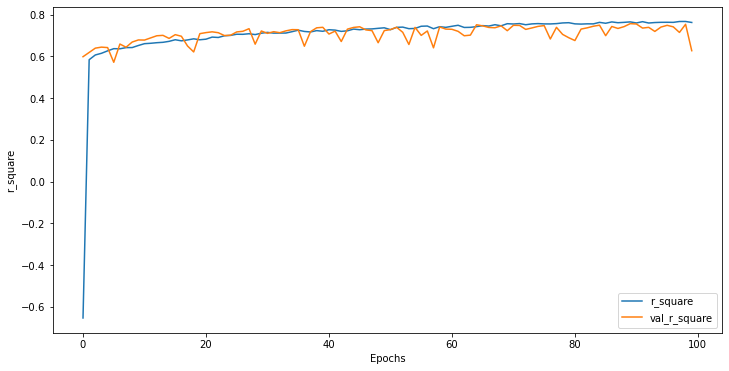

In [293]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plt.figure(figsize = (12,6))
plot_history(history, 'r_square')

In [ ]:
import pandas as pd
data_4 = pd.read_excel("Data Sets/Data Set 4.xlsx")
data_4.head()

In [97]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras import Sequential
X_train.shape[1]

12

In [100]:
def create_model():
    model = Sequential()
    model.add(Dense(400, input_dim=12, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.20))
    model.add(Dense(1))
    # Compile model
    return model
#Model is called here
model=create_model()
sgd = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=sgd, metrics = [r_square])

In [99]:
model = model.fit(X_train,y_train,epochs = 100,verbose = 1,validation_data =(X_test,y_test)) # Data for evaluation

Epoch 1/100


ValueError: in user code:

    File "/Users/tool_vicarious/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/tool_vicarious/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/tool_vicarious/env1/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/tool_vicarious/env1/lib/python3.9/site-packages/keras/engine/training.py", line 864, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/tool_vicarious/env1/lib/python3.9/site-packages/keras/engine/training.py", line 957, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/tool_vicarious/env1/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 438, in update_state
        self.build(y_pred, y_true)
    File "/Users/tool_vicarious/env1/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 358, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(y_pred, self._get_metric_objects,
    File "/Users/tool_vicarious/env1/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 484, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/Users/tool_vicarious/env1/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 484, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "/Users/tool_vicarious/env1/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 503, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "/Users/tool_vicarious/env1/lib/python3.9/site-packages/keras/metrics.py", line 4266, in get
        raise ValueError(

    ValueError: Could not interpret metric identifier: -0.418765664100647


In [315]:
from keras import backend as K
test_y_predict = tf.convert_to_tensor(model.predict(x_test_scaled),dtype = 'float')
print("R2 Score for Test: ", r_square(test_y_predict,tf.convert_to_tensor(y_test_scaled,dtype = 'float')))
train_y_predict = tf.convert_to_tensor(model.predict(x_train_scaled.iloc[:,1:]),dtype = 'float')
print("R2 Score for Train: ", r_square(train_y_predict,tf.convert_to_tensor(y_train_scaled,dtype = 'float')))

R2 Score for Test:  tf.Tensor(0.4639284, shape=(), dtype=float32)
R2 Score for Train:  tf.Tensor(0.520316, shape=(), dtype=float32)


In [272]:
model.evaluate(x_test_scaled)

111/111 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - r_square: 0.0000e+00


[0.0, 0.0]

In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [202]:
simple_nn = Sequential()
simple_nn.add(InputLayer(x_train_scaled.iloc[:,1:].shape[1],))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))

Metal device set to: Apple M1 Pro


2022-07-17 11:35:31.872174: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-17 11:35:31.872592: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [203]:
opt = Adam()
cp = ModelCheckpoint('models/simple_nn',save_best_only = True)

In [204]:
simple_nn.compile(optimizer = opt,loss = 'mse',metrics = [RootMeanSquaredError()])
simple_nn.fit(x = x_train_scaled.iloc[:,1:],y = y_train_scaled, validation_data = (x_test_scaled,y_test_scaled),
             callbacks = [cp],epochs = 100)

Epoch 1/100


2022-07-17 11:38:29.005277: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-17 11:38:29.223478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - ETA: 0s - loss: 0.7896 - root_mean_squared_error: 0.8886

2022-07-17 11:38:33.321435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-07-17 11:38:33.710140: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/simple_nn/assets
443/443 [==============================] - 5s 6ms/step - loss: 0.7896 - root_mean_squared_error: 0.8886 - val_loss: 0.5931 - val_root_mean_squared_error: 0.7701
Epoch 2/100
443/443 [==============================] - 3s 6ms/step - loss: 0.5261 - root_mean_squared_error: 0.7254 - val_loss: 0.4774 - val_root_mean_squared_error: 0.6909
Epoch 3/100
443/443 [==============================] - 3s 6ms/step - loss: 0.4601 - root_mean_squared_error: 0.6783 - val_loss: 0.4346 - val_root_mean_squared_error: 0.6592
Epoch 4/100
443/443 [==============================] - 3s 6ms/step - loss: 0.4293 - root_mean_squared_error: 0.6552 - val_loss: 0.4090 - val_root_mean_squared_error: 0.6395
Epoch 5/100
443/443 [==============================] - 3s 6ms/step - loss: 0.4076 - root_mean_squared_error: 0.6385 - val_loss: 0.3903 - val_root_mean_squared_error: 0.6247
Epoch 6/100
443/443 [==============================] - 3s 6ms/step - loss: 0.3926 - root

Epoch 29/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3552 - root_mean_squared_error: 0.5960 - val_loss: 0.3546 - val_root_mean_squared_error: 0.5955
Epoch 30/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3548 - root_mean_squared_error: 0.5956 - val_loss: 0.3544 - val_root_mean_squared_error: 0.5953
Epoch 31/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3546 - root_mean_squared_error: 0.5955 - val_loss: 0.3529 - val_root_mean_squared_error: 0.5941
Epoch 32/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3541 - root_mean_squared_error: 0.5951 - val_loss: 0.3531 - val_root_mean_squared_error: 0.5942
Epoch 33/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3544 - root_mean_squared_error: 0.5953 - val_loss: 0.3534 - val_root_mean_squared_error: 0.5945
Epoch 34/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3542 - root_mean_squared_error: 0.5952 - val_loss: 0

Epoch 70/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3526 - root_mean_squared_error: 0.5938 - val_loss: 0.3517 - val_root_mean_squared_error: 0.5930
Epoch 71/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3526 - root_mean_squared_error: 0.5938 - val_loss: 0.3513 - val_root_mean_squared_error: 0.5927
Epoch 72/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3523 - root_mean_squared_error: 0.5936 - val_loss: 0.3515 - val_root_mean_squared_error: 0.5929
Epoch 73/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3521 - root_mean_squared_error: 0.5934 - val_loss: 0.3521 - val_root_mean_squared_error: 0.5934
Epoch 74/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3523 - root_mean_squared_error: 0.5935 - val_loss: 0.3521 - val_root_mean_squared_error: 0.5934
Epoch 75/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3521 - root_mean_squared_error: 0.5934 - val_loss: 0

In [213]:
from tensorflow.keras.models import load_model
simple_nn = load_model('models/simple_nn')
print(mse(medium_nn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled))
print(mse(medium_nn.predict(x_test_scaled),y_test_scaled))

2022-07-17 12:00:24.359862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.4003097908807233
0.3931024149630959


In [208]:
print("R2 Score",round(r2_score(y_test_scaled,medium_nn.predict(x_test_scaled)),3))

R2 Score 0.649


2022-07-17 12:01:06.345069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


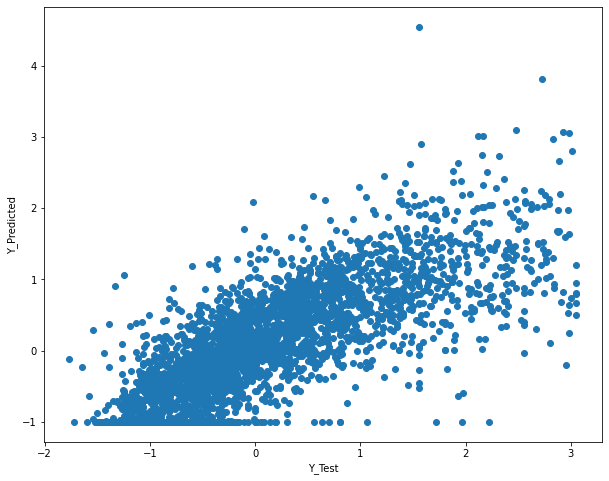

In [215]:
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,simple_nn.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

In [212]:
medium_nn = Sequential()
medium_nn.add(InputLayer((x_train_scaled.iloc[:,1:].shape[1],)))
medium_nn.add(Dense(32,'relu'))
medium_nn.add(Dense(16,'relu'))
medium_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate = 0.1)
cp = ModelCheckpoint('models/medium_nn',save_best_only = True)
medium_nn.compile(optimizer = opt,loss = 'mse',metrics = [RootMeanSquaredError()])
medium_nn.fit(x = x_train_scaled.iloc[:,1:],y = y_train_scaled, validation_data = (x_test_scaled,y_test_scaled),
             callbacks = [cp],epochs = 100)


Epoch 1/100


2022-07-17 11:54:46.850920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - ETA: 0s - loss: 0.4765 - root_mean_squared_error: 0.6903

2022-07-17 11:54:50.296349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: models/medium_nn/assets
443/443 [==============================] - 4s 8ms/step - loss: 0.4765 - root_mean_squared_error: 0.6903 - val_loss: 0.4334 - val_root_mean_squared_error: 0.6583
Epoch 2/100
443/443 [==============================] - 3s 7ms/step - loss: 0.4143 - root_mean_squared_error: 0.6436 - val_loss: 0.3372 - val_root_mean_squared_error: 0.5807
Epoch 3/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3733 - root_mean_squared_error: 0.6110 - val_loss: 0.3926 - val_root_mean_squared_error: 0.6266
Epoch 4/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3812 - root_mean_squared_error: 0.6174 - val_loss: 0.4501 - val_root_mean_squared_error: 0.6709
Epoch 5/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3862 - root_mean_squared_error: 0.6214 - val_loss: 0.3477 - val_root_mean_squared_error: 0.5897
Epoch 6/100
443/443 [==============================] - 2s 6ms/step - loss: 0.3907 - root

Epoch 47/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4111 - root_mean_squared_error: 0.6411 - val_loss: 0.3798 - val_root_mean_squared_error: 0.6163
Epoch 48/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4031 - root_mean_squared_error: 0.6349 - val_loss: 0.3721 - val_root_mean_squared_error: 0.6100
Epoch 49/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4124 - root_mean_squared_error: 0.6422 - val_loss: 0.3776 - val_root_mean_squared_error: 0.6145
Epoch 50/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4182 - root_mean_squared_error: 0.6467 - val_loss: 0.3784 - val_root_mean_squared_error: 0.6152
Epoch 51/100
443/443 [==============================] - 2s 5ms/step - loss: 0.3994 - root_mean_squared_error: 0.6320 - val_loss: 0.3920 - val_root_mean_squared_error: 0.6261
Epoch 52/100
443/443 [==============================] - 2s 5ms/step - loss: 0.4100 - root_mean_squared_error: 0.6403 - val_loss: 0

In [214]:
medium_nn = load_model('models/medium_nn')
print(mse(medium_nn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled))
print(mse(medium_nn.predict(x_test_scaled),y_test_scaled))

2022-07-17 12:00:29.600197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.3369767979908277
0.3371900933647524


In [216]:
print("R2 Score",round(r2_score(y_test_scaled,medium_nn.predict(x_test_scaled)),3))

R2 Score 0.663


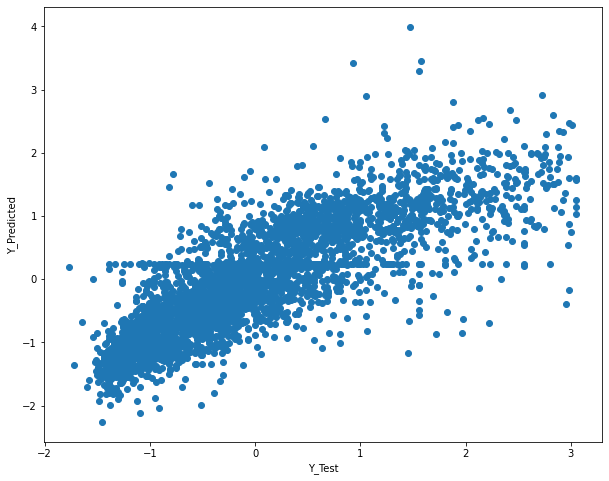

In [217]:
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,medium_nn.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()

In [220]:
y_train_scaled.value_counts()

median_house_value
-0.557943             94
-0.300555             93
-0.815330             79
-0.043167             68
 0.342914             67
                      ..
 1.609262              1
 0.422190              1
 1.615439              1
 1.616469              1
 0.325412              1
Length: 3564, dtype: int64

In [227]:
large_nn = Sequential()
large_nn.add(InputLayer((x_train_scaled.iloc[:,1:].shape[1],)))
large_nn.add(Dense(256,'relu'))
large_nn.add(Dense(128,'relu'))
large_nn.add(Dense(64,'relu'))
large_nn.add(Dense(32,'relu'))
large_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate = 0.1)
cp = ModelCheckpoint('models/large_nn',save_best_only = True)
large_nn.compile(optimizer = opt,loss = 'mse',metrics = [RootMeanSquaredError()])
large_nn.fit(x = x_train_scaled.iloc[:,1:],y = y_train_scaled, validation_data = (x_test_scaled,y_test_scaled),
             callbacks = [cp],epochs = 100)

Epoch 1/100
  9/443 [..............................] - ETA: 2s - loss: 774.7141 - root_mean_squared_error: 27.8337

2022-07-17 13:11:44.023158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


443/443 [==============================] - ETA: 0s - loss: 17.2999 - root_mean_squared_error: 4.1593

2022-07-17 13:11:46.822371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: models/large_nn/assets
443/443 [==============================] - 4s 8ms/step - loss: 17.2999 - root_mean_squared_error: 4.1593 - val_loss: 0.4956 - val_root_mean_squared_error: 0.7040
Epoch 2/100
443/443 [==============================] - 4s 8ms/step - loss: 0.4700 - root_mean_squared_error: 0.6856 - val_loss: 0.4038 - val_root_mean_squared_error: 0.6355
Epoch 3/100
443/443 [==============================] - 3s 8ms/step - loss: 0.3838 - root_mean_squared_error: 0.6195 - val_loss: 0.3454 - val_root_mean_squared_error: 0.5877
Epoch 4/100
443/443 [==============================] - 3s 7ms/step - loss: 0.3480 - root_mean_squared_error: 0.5899 - val_loss: 0.3936 - val_root_mean_squared_error: 0.6273
Epoch 5/100
443/443 [==============================] - 3s 7ms/step - loss: 0.3552 - root_mean_squared_error: 0.5960 - val_loss: 0.3579 - val_root_mean_squared_error: 0.5983
Epoch 6/100
443/443 [==============================] - 3s 8ms/step - loss: 0.3439 - root

443/443 [==============================] - 3s 7ms/step - loss: 1.0083 - root_mean_squared_error: 1.0041 - val_loss: 1.0194 - val_root_mean_squared_error: 1.0096
Epoch 93/100
443/443 [==============================] - 3s 7ms/step - loss: 1.0088 - root_mean_squared_error: 1.0044 - val_loss: 1.0043 - val_root_mean_squared_error: 1.0022
Epoch 94/100
443/443 [==============================] - 3s 6ms/step - loss: 1.0069 - root_mean_squared_error: 1.0034 - val_loss: 1.0053 - val_root_mean_squared_error: 1.0027
Epoch 95/100
443/443 [==============================] - 3s 6ms/step - loss: 1.0103 - root_mean_squared_error: 1.0051 - val_loss: 1.0070 - val_root_mean_squared_error: 1.0035
Epoch 96/100
443/443 [==============================] - 3s 6ms/step - loss: 1.0046 - root_mean_squared_error: 1.0023 - val_loss: 1.0102 - val_root_mean_squared_error: 1.0051
Epoch 97/100
443/443 [==============================] - 3s 6ms/step - loss: 1.0068 - root_mean_squared_error: 1.0034 - val_loss: 1.0048 - val_r

2022-07-17 13:17:43.351588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.32236815883972236
0.3239340758690869
R2 Score 0.676


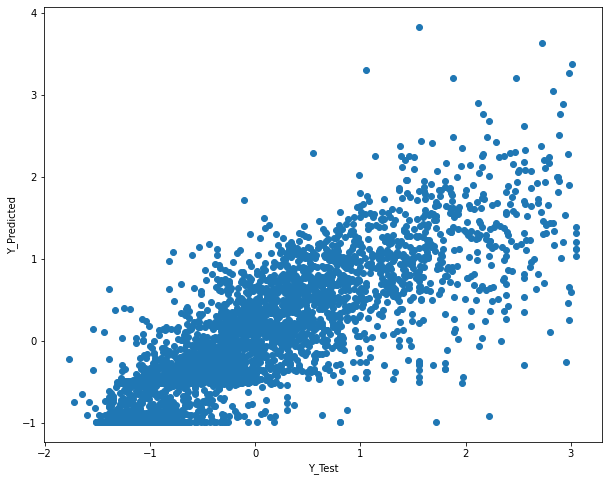

In [228]:
large_nn = load_model('models/large_nn')
print(mse(large_nn.predict(x_train_scaled.iloc[:,1:]),y_train_scaled))
print(mse(large_nn.predict(x_test_scaled),y_test_scaled))
print("R2 Score",round(r2_score(y_test_scaled,large_nn.predict(x_test_scaled)),3))
plt.figure(figsize = (10,8))
plt.scatter(y_test_scaled,large_nn.predict(x_test_scaled))
plt.xlabel('Y_Test')
plt.ylabel('Y_Predicted')
plt.show()